# Predicción de enfermedades cardíacas

### Hipótesis

Según la Organización Mundial de la Salud (OMS), las enfermedades cardiovasculares son la primera causa de muerte en el mundo, siendo responsable de la pérdida de 18 millones de vidas al año. Si bien existen factores de riesgo naturales como la edad o antecedentes familiares de enfermedad cardiovascular en edad temprana, existen otros que pueden ser adquiridos como hábitos de la vida diaria: tabaquismo, consumo de alcohol, sedentarismo, mala alimentación, entre otros. 


### Objetivo y alcance

Por eso es que detectar y prevenir los factores que tienen mayor impacto en las enfermedades cardíacas es muy importante para cuidar nuestra salud. El objetivo del proyecto es este, contribuir a la sociedad a detectar y predecir las variables determinantes que nos ponen en riesgo y tomar conciencia para empezar a cuidarnos.

# Data Adquisition

### Importación de librerias

In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

### Metadata

DICCIONARIO DE DATOS

DATASET 1 --> HEARTDISEASE

- sex: Genero masculino o femenino
- age: Edad de la persona
- education: Nivel de eduacacion
- smokingStatus: Indica si la persona fuma
- cigsPerDay: Numero de cigarrillos que fuma una persona en un dia
- BPMeds: Indica si la persona toma medicaciones (1: toma, 2: no toma)
- prevalentStroke: Persona que tuvo un derrame cerebral (1: si, 0: no)
- prevalentHyp: Persona que tiene hipertension
- diabetes: Persona que tiene diabetes
- totChol: Nivel total de colesterol de una persona
- sysBP: Presión arterial sistólica de la persona
- diaBP: Presión arterial diastólica de la persona
- BMI: Indice de masa corporal
- heartRate: Frecuencia cardíaca en reposo de la persona
- glucose: nivel de glucosa en sangre de la persona
- CHDRisk: Indica si la persona presenta riesgo de padecer enfermedad cardíaca

DATASET 2 --> HEART_2020_CLEANED

- HeartDisease: Indica si la persona presenta riesgo de padecer enfermedad cardíaca
- BMI: Indice de masa corporal
- Smoking: Persona que fuma
- AlcoholDrinking: Persona que toma mucho alcohol (hombres + de 14 bebidas por semana, mujeres + de 7 bebidas por semana)
- Stroke: Persona que sufrio un derrame cerebral
- PhysicalHealth: Cuantos de los últimos 30 días la persona hizo ejercicio
- MentalHealth: Cuantos de los últimos 30 dias la persona no estuvo bien mentalmente
- DiffWalking: Persona que tiene dificultades para caminar o subir escaleras
- Sex: sexo femenino o masculino
- AgeCategory: categoria de edad
- Race: Valor de etnicidad imputado
- Diabetic: Persona que fue informada de tener diabetes
- PhysicalActivity: Adulto que informó haber realizado actividad física durante los últimos 30 días fuera de su trabajo habitual
- GenHealth: Genética
- SleepTime: Horas de sueño
- Asthma: Persona que tuvo asthma
- Kidney Disease: Persona que tuvo enfermedad renal, sin contar incontinencia
- SkinCancer: Persona que tuvo cancer de piel


### Lectura del dataset

In [3]:
df1=pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Heart-Disease-Prediction/main/Datos/disease.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/Heart-Disease-Prediction/main/Datos/heart_2020_cleaned.csv')

### Estructura de los datasets

In [3]:
df1.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [5]:
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### ABC - Analisis de ambos datasets por separado

In [4]:
print (f'El tamanio del primer dataset es es de {df1.shape}')
print (f'El tamanio del segundo dataset es es de {df2.shape}')

El tamanio del primer dataset es es de (3674, 16)
El tamanio del segundo dataset es es de (319795, 18)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
df1.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.00000,3674.000000,3674.000000,3674.000000,3674.000000
mean,49.577300,1.984213,9.092270,0.030212,0.005716,0.310016,236.761840,132.38024,82.906505,25.783038,75.719652,81.769461
std,8.546068,1.022891,11.938399,0.171194,0.075397,0.462563,44.039295,22.04683,11.948024,4.056048,11.957171,23.884454
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.50000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.00000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,143.50000,89.500000,27.990000,82.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,600.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [10]:
df2.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Data Wrangling

### Concatenación de ambos datasets y estructura del dataset final

In [11]:
df1.columns

Index(['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CHDRisk'],
      dtype='object')

In [12]:
df2.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
# Renombre de columnas para una mayor claridad
df1.rename(columns={'smokingStatus': 'Smoking'}, inplace=True)
df1.rename(columns={'CHDRisk': 'HeartDisease'}, inplace=True)
df2.rename(columns={'Sex': 'sex'}, inplace=True)
df2.rename(columns={'Diabetic': 'diabetes'}, inplace=True)
df1.rename(columns= {'prevalentStroke': 'Stroke'}, inplace=True)



In [5]:
#ANALISIS de la variable stroke en ambos datasets

df1['Stroke'].head()

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [6]:
df2['Stroke'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Stroke, dtype: object

In [5]:
#Vemos que en un dataset la variable es categorica y en la otra es numerica.
#Transformamos la variable categorica para que todo tenga el mismo formato
df2['Stroke'] = df2['Stroke'].map({'Yes': 1, 'No': 0})

In [17]:
df2['Stroke'].head()

0    0
1    1
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [6]:
#concatenacion de ambos datasets en uno solo
df = pd.concat([df1, df2]) 

In [7]:
df.head()

,sex,age,education,Smoking,cigsPerDay,BPMeds,Stroke,prevalentHyp,diabetes,totChol,...,MentalHealth,DiffWalking,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,male,39.0,4.0,no,0.0,0.0,0,0.0,no,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,46.0,2.0,no,0.0,0.0,0,0.0,no,250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,male,48.0,1.0,yes,20.0,0.0,0,0.0,no,245.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female,61.0,3.0,yes,30.0,0.0,0,1.0,no,225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,46.0,3.0,yes,23.0,0.0,0,0.0,no,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.columns

Index(['sex', 'age', 'education', 'Smoking', 'cigsPerDay', 'BPMeds', 'Stroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'HeartDisease', 'AlcoholDrinking',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Race',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323469 entries, 0 to 319794
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               323458 non-null  object 
 1   age               3674 non-null    float64
 2   education         3674 non-null    float64
 3   Smoking           323456 non-null  object 
 4   cigsPerDay        3674 non-null    float64
 5   BPMeds            3674 non-null    float64
 6   Stroke            323469 non-null  int64  
 7   prevalentHyp      3674 non-null    float64
 8   diabetes          323469 non-null  object 
 9   totChol           3674 non-null    float64
 10  sysBP             3674 non-null    float64
 11  diaBP             3674 non-null    float64
 12  BMI               323469 non-null  float64
 13  heartRate         3674 non-null    float64
 14  glucose           3674 non-null    float64
 15  HeartDisease      323469 non-null  object 
 16  AlcoholDrinking   319795 

In [22]:
df.describe()

,age,education,cigsPerDay,BPMeds,Stroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,PhysicalHealth,MentalHealth,SleepTime
count,3674.000000,3674.000000,3674.000000,3674.000000,323469.000000,3674.000000,3674.000000,3674.00000,3674.000000,323469.000000,3674.000000,3674.000000,319795.00000,319795.000000,319795.000000
mean,49.577300,1.984213,9.092270,0.030212,0.037376,0.310016,236.761840,132.38024,82.906505,28.296522,75.719652,81.769461,3.37171,3.898366,7.097075
std,8.546068,1.022891,11.938399,0.171194,0.189682,0.462563,44.039295,22.04683,11.948024,6.340389,11.957171,23.884454,7.95085,7.955235,1.436007
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.50000,48.000000,12.020000,44.000000,40.000000,0.00000,0.000000,1.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,75.000000,24.020000,68.000000,71.000000,0.00000,0.000000,6.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.00000,82.000000,27.320000,75.000000,78.000000,0.00000,0.000000,7.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,143.50000,89.500000,31.350000,82.000000,87.000000,2.00000,3.000000,8.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,600.000000,295.00000,142.500000,94.850000,143.000000,394.000000,30.00000,30.000000,24.000000


In [23]:
df.shape

(323469, 28)

### Variables Categoricas vs Variables Numericas

In [8]:
#VARIABLES CATEGORICAS
categoricas = df.select_dtypes(include=['object'])
categoricas.columns

Index(['sex', 'Smoking', 'diabetes', 'HeartDisease', 'AlcoholDrinking',
       'DiffWalking', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
#VARIABLES NUMERICAS
numericas = df.select_dtypes(include=['int', 'float'])
numericas.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'Stroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'PhysicalHealth', 'MentalHealth', 'SleepTime'],
      dtype='object')

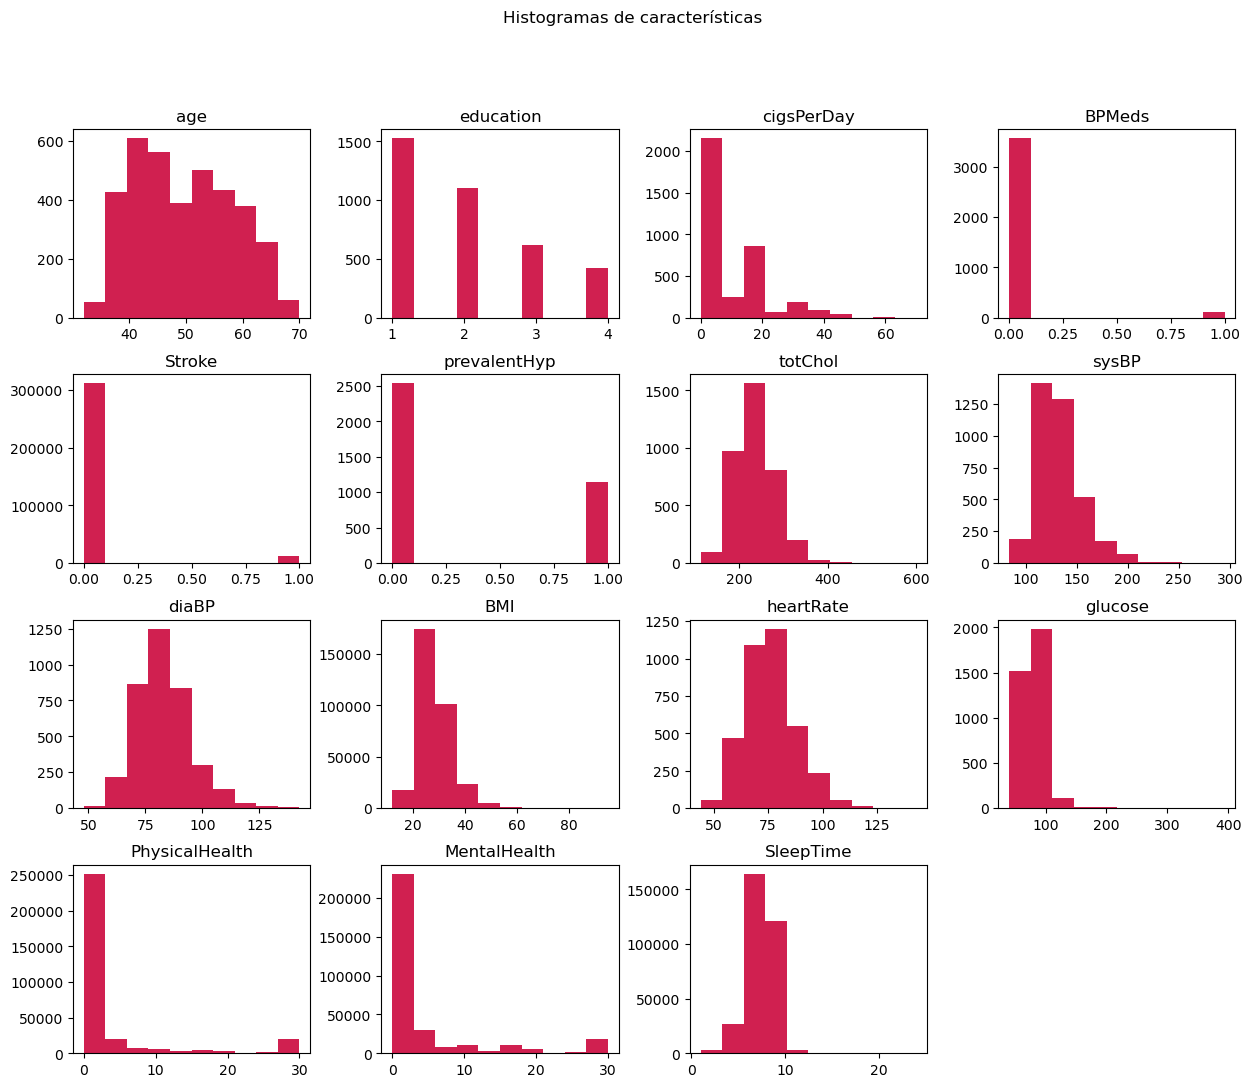

In [11]:
numericas.hist(figsize=(15, 12), grid=False, color='#D02050')
#FF2050
plt.suptitle("Histogramas de características ")
plt.show()

Este gráfico nos muestra la distribución de cada una de las variables para luego poder separar en variables normales y no normales. Si la variable sigue la campana de gauss o tiende a eso se considera normal. Por el contrario, podemos ver que hay variables no normales que estan sesgadas a izquierda o a derecha y otras que no presentan simetría.

DETERMINACION DE VARIABLES NORMALES Y NO NORMALES
- Análisis de la media y la mediana de cada variable

In [10]:
#Analisis de media y mediana de cada variable
#creacion de un diccionario para almacenar los resultados
resultados  = { 'Columna': [], 'Media' : [], 'Mediana' : []}
#recorrer cada columna del dataset
for columna in numericas.columns:
    media = numericas[columna].mean()
    mediana = numericas[columna].median()
    resultados['Columna'].append(columna)
    resultados['Media'].append(media)
    resultados['Mediana'].append(mediana)

#creo un dataframe con los resultados para una mejor visualizacion
df_resultados = pd.DataFrame(resultados)

df_resultados

,Columna,Media,Mediana
0,age,49.577300,49.00
1,education,1.984213,2.00
2,cigsPerDay,9.092270,0.00
3,BPMeds,0.030212,0.00
4,Stroke,0.037376,0.00
5,prevalentHyp,0.310016,0.00
6,totChol,236.761840,234.00
7,sysBP,132.380240,128.00
8,diaBP,82.906505,82.00
9,BMI,28.296522,27.32


A partir de los resultados que se visualizan en el dataset, podemos se saca la conclusion de que las variables cuya media es similar a la mediana son normales o tienden a eso.'
A continuacion se dividen las variables numericas en normales y no normales. Además, los gráficos de las distribuciones son de gran ayuda, para ver si las variables siguen la campana de Gauss

In [11]:
normales = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'SleepTime' ]
df_normales = numericas [normales]
df_normales.columns

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'SleepTime'], dtype='object')

In [12]:
df_NOnormales = numericas.drop(columns= normales)
df_NOnormales.columns

Index(['education', 'cigsPerDay', 'BPMeds', 'Stroke', 'prevalentHyp',
       'glucose', 'PhysicalHealth', 'MentalHealth'],
      dtype='object')

### Visualización y tratamiento de datos nulos

In [15]:
df.isnull().sum()

sex                     11
age                 319795
education           319795
Smoking                 13
cigsPerDay          319795
BPMeds              319795
Stroke                   0
prevalentHyp        319795
diabetes                 0
totChol             319795
sysBP               319795
diaBP               319795
BMI                      0
heartRate           319795
glucose             319795
HeartDisease             0
AlcoholDrinking       3674
PhysicalHealth        3674
MentalHealth          3674
DiffWalking           3674
AgeCategory           3674
Race                  3674
PhysicalActivity      3674
GenHealth             3674
SleepTime             3674
Asthma                3674
KidneyDisease         3674
SkinCancer            3674
dtype: int64

VARIABLES CATEGORICAS

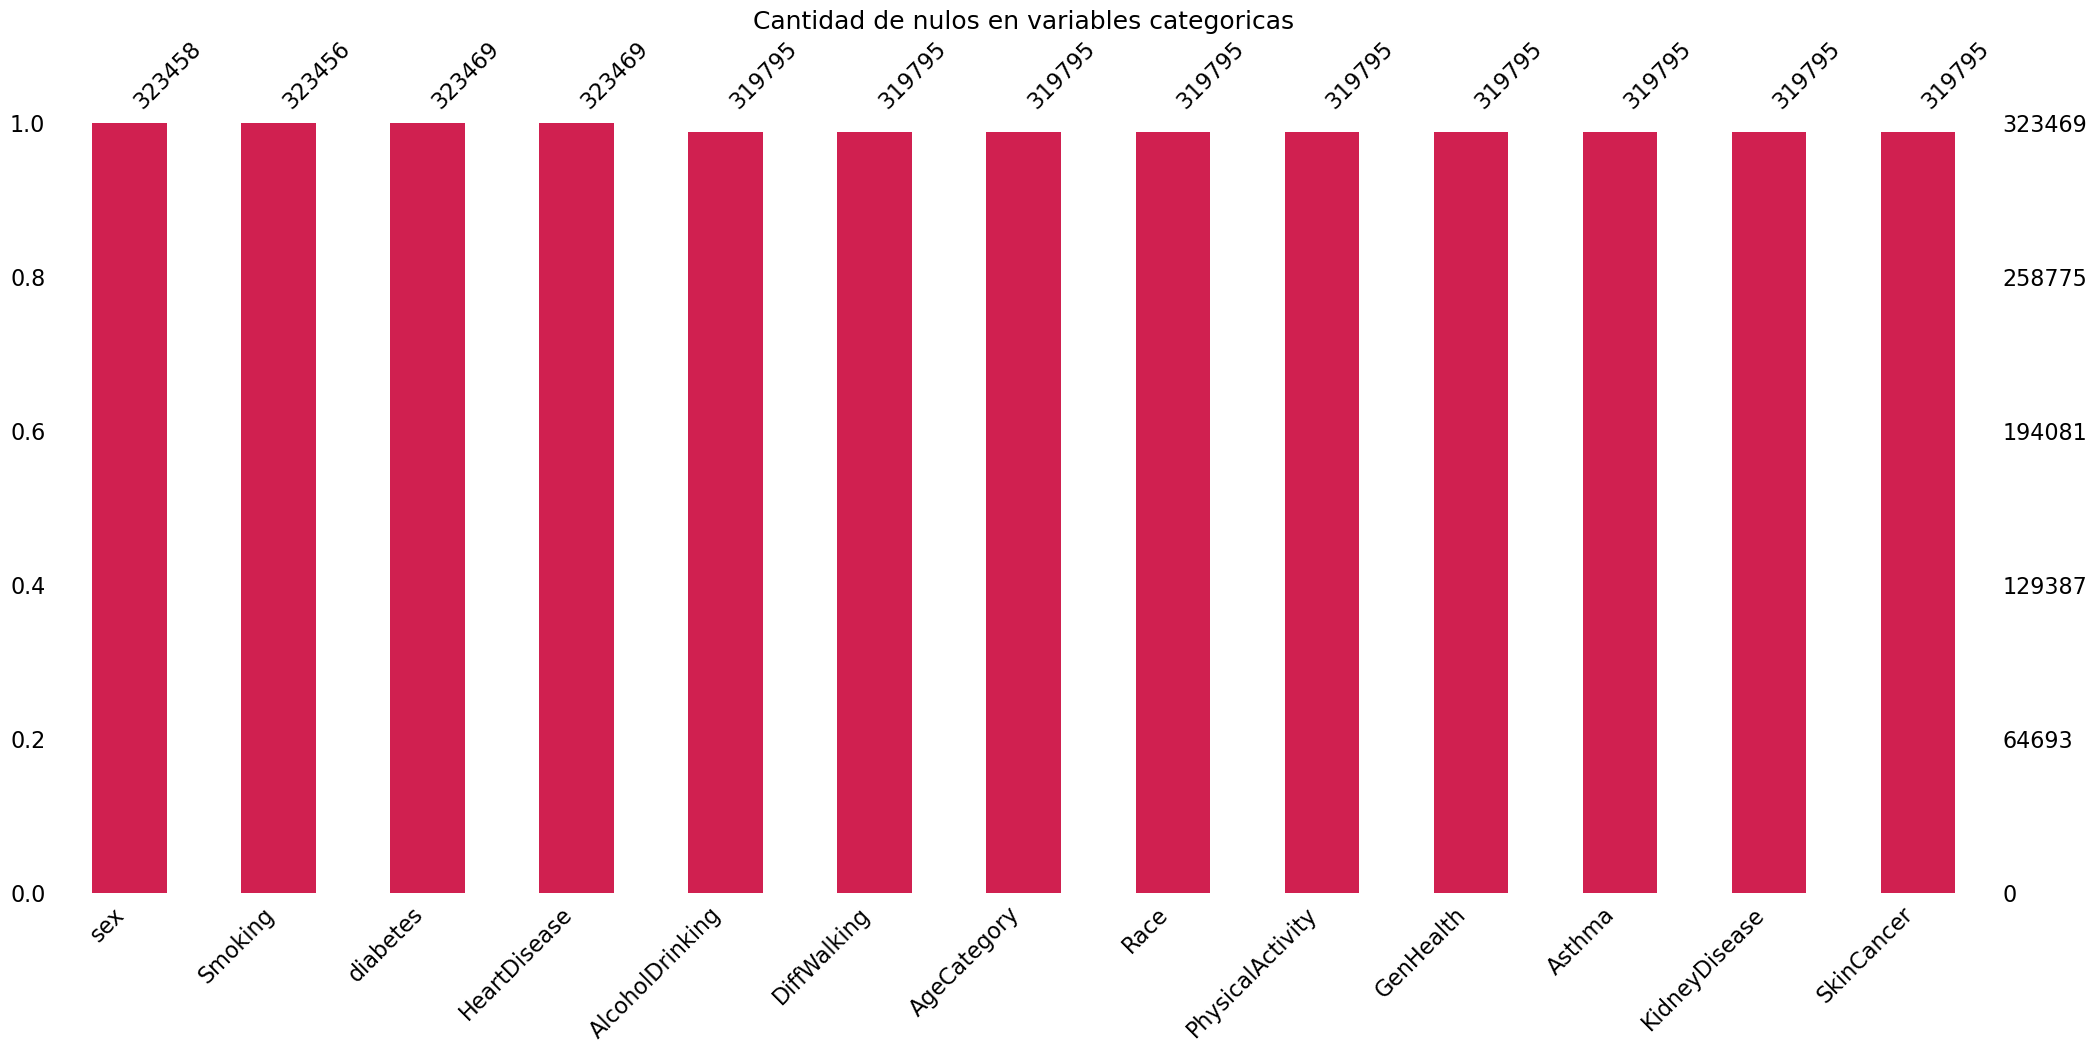

In [16]:
msno.bar(categoricas, color='#D02050')
plt.title('Cantidad de nulos en variables categoricas', fontsize=18)
plt.show()

Los datos nulos en las variables categóricas se reemplazan con la moda

In [13]:
# VARIABLES CATEGORICAS
from sklearn.impute import SimpleImputer#libreria ML


COPIA_categoricas = categoricas.copy() # se crea una copia para no modificar el df categoricas

imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # se define el imputador

transformados = imputador.fit_transform(COPIA_categoricas) # transformación del dataset

transformados=pd.DataFrame(transformados) # se transforma el array en dataframe
transformados = transformados.rename (columns={0: 'sex', 1: 'Smoking', 2: 'diabetes', 3: 'HeartDisease', 4: 'AlcoholDrinking', 5: 'DiffWalking', 6: 'AgeCategory', 7: 'Race', 8: 'PhysicalActivity', 9: 'GenHealth', 10: 'Asthma', 11: 'KidneyDisease', 12: 'SkinCancer'})

transformados.isnull().sum()

categoricas = transformados.copy()

VARIABLES NUMERICAS NORMALES

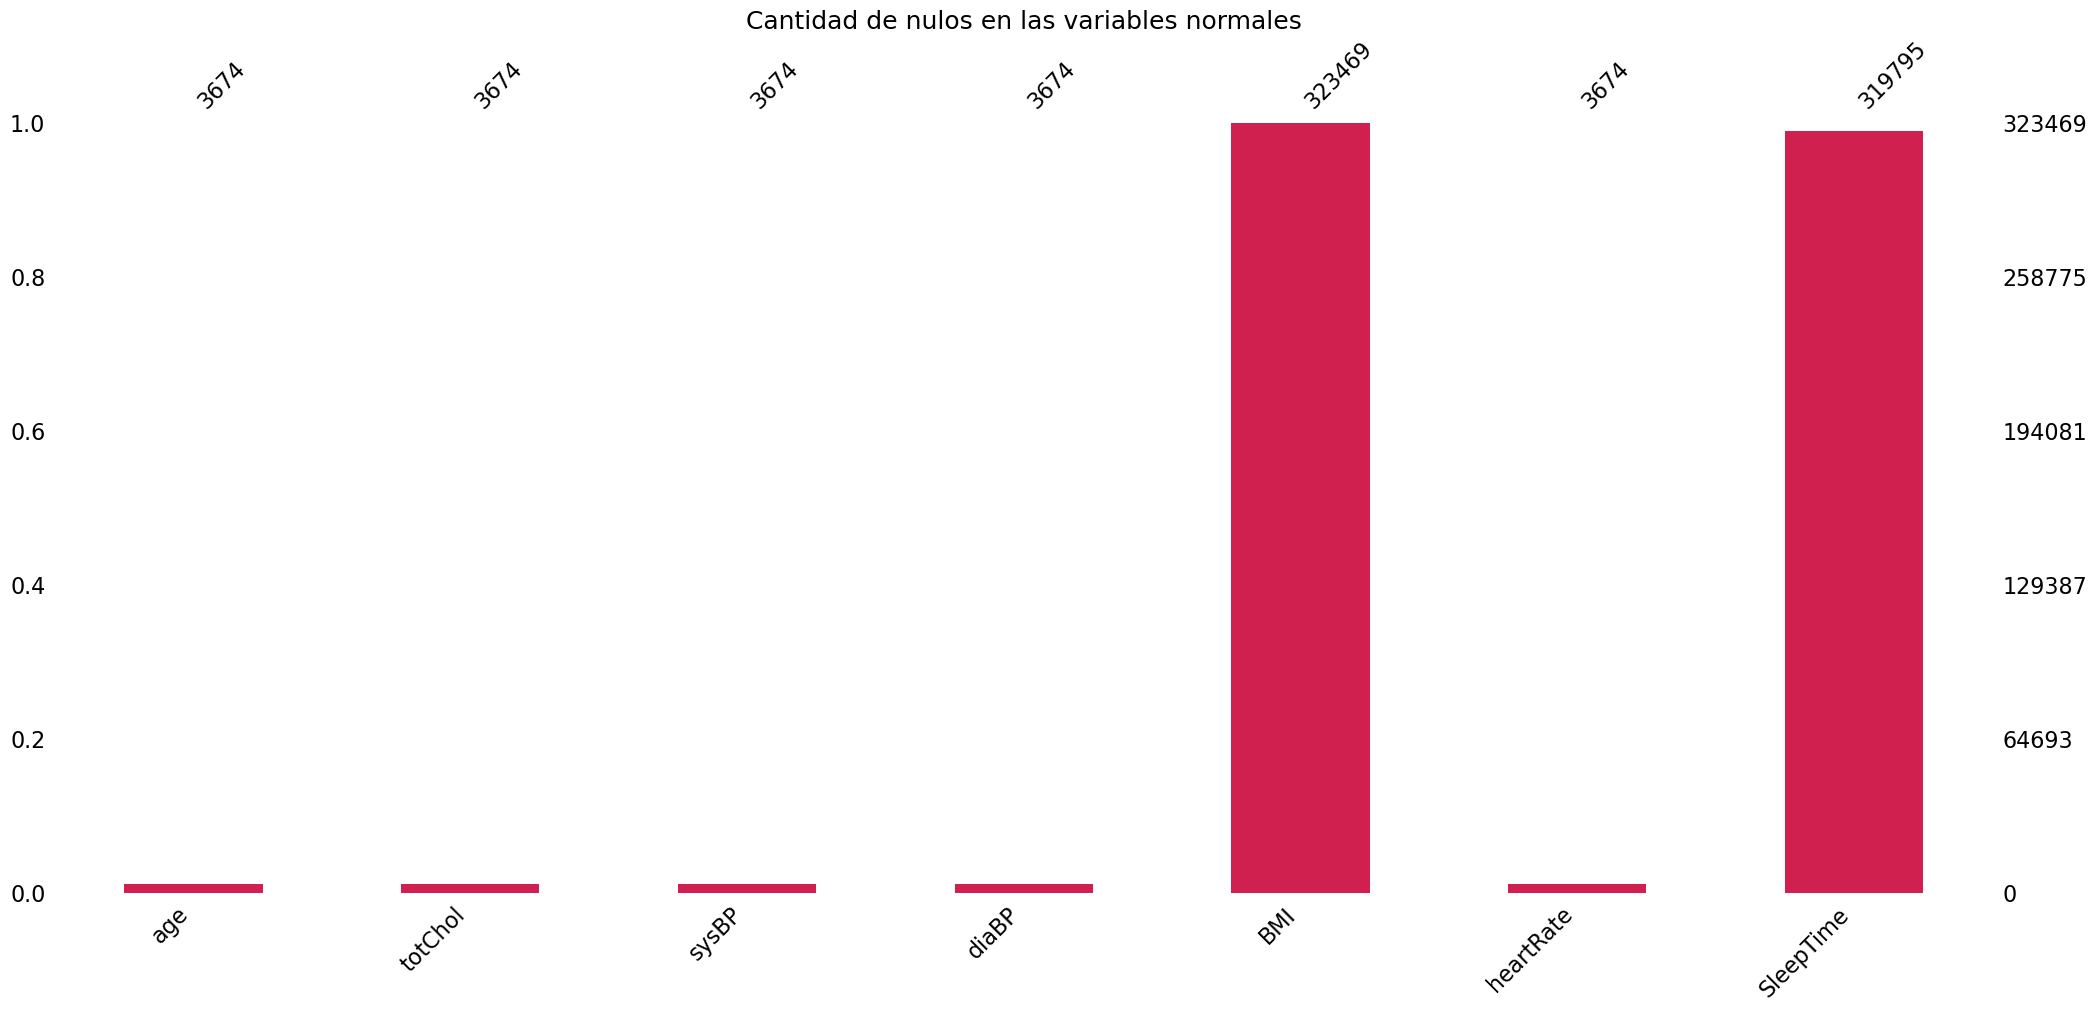

In [33]:
msno.bar(df_normales, color='#D02050')
plt.title('Cantidad de nulos en las variables normales', fontsize = 18)
plt.show()

Los datos nulos en las variables numericas normales se reemplazan con la media

In [14]:
COPIA_normales =  df_normales.copy() #se crea una copia para no modificar el dataset con un error

imputador = SimpleImputer(missing_values=np.nan, strategy='mean') #se define el imputador

transformados = imputador.fit_transform(COPIA_normales) #transformacion del dataset

transformados = pd.DataFrame(transformados) #se transforma el array en dataset

transformados = transformados.rename(columns={0: 'age', 1: 'totChol', 2: 'sysBP', 3: 'diaBP', 4: 'BMI', 5: 'heartRate', 6: 'SleepTime'})

transformados.isnull().sum()

df_normales = transformados.copy()

VARIABLES NUMERICAS NO NORMALES

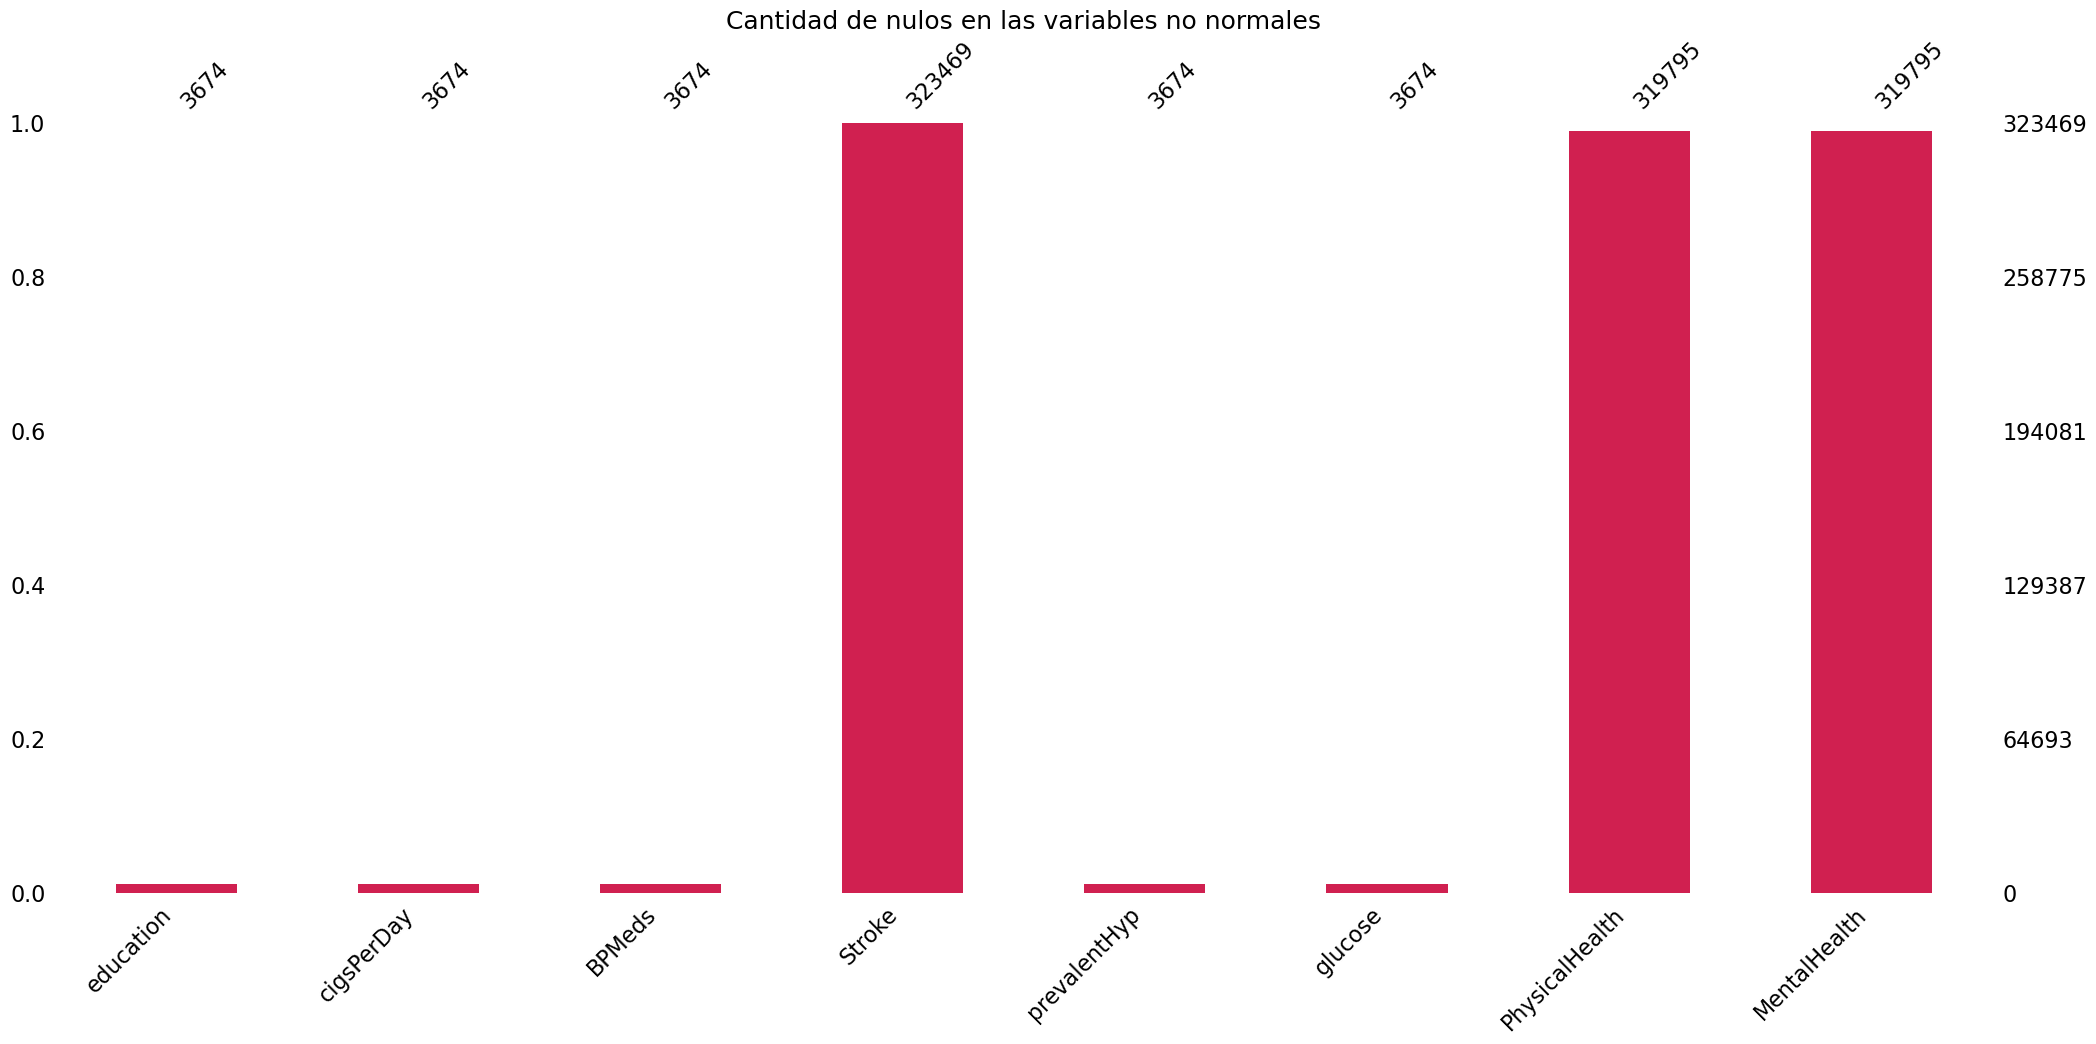

In [35]:
msno.bar(df_NOnormales, color='#D02050')
plt.title('Cantidad de nulos en las variables no normales', fontsize = 18)
plt.show()

In [15]:
COPIA_NOnormales = df_NOnormales.copy() #se crea una copia para no modificar el dataset

imputador = SimpleImputer(missing_values=np.nan, strategy='median') #se define el imputador

transformados = imputador.fit_transform(COPIA_NOnormales) #transformacion del dataset

transformados = pd.DataFrame(transformados) #se transforma el array en dataset

transformados = transformados.rename(columns={0: 'education', 1: 'cigsPerDay', 2: 'BPMeds', 3: 'prevalentStroke', 4: 'prevalentHyp', 5: 'glucose', 6: 'PhysicalHealth', 7: 'MentalHealth'})

transformados.isnull().sum()

df_NOnormales = transformados.copy()


### Transformacion de variables

- Las variable que dicen "yes" pasaran a valer 1
- Las variables que dicen "no" pasaran a valer 0

In [37]:
categoricas.columns

Index(['sex', 'Smoking', 'diabetes', 'HeartDisease', 'AlcoholDrinking',
       'DiffWalking', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [38]:
categoricas.head()

,sex,Smoking,diabetes,HeartDisease,AlcoholDrinking,DiffWalking,AgeCategory,Race,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,male,no,no,no,No,No,65-69,White,Yes,Very good,No,No,No
1,female,no,no,no,No,No,65-69,White,Yes,Very good,No,No,No
2,male,yes,no,no,No,No,65-69,White,Yes,Very good,No,No,No
3,female,yes,no,yes,No,No,65-69,White,Yes,Very good,No,No,No
4,female,yes,no,no,No,No,65-69,White,Yes,Very good,No,No,No


In [16]:
variables_a_encodear = ['Smoking', 'diabetes', 'HeartDisease', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
COPIA_categoricas = categoricas.copy()

for columna in variables_a_encodear:
    #con astype(str) se pasa todo a string para evitar errores
    #con strip se eliminan los espacios
    #con lower se deja todo en minuscula para evitar problemas
    COPIA_categoricas[columna] = COPIA_categoricas[columna].astype(str).str.strip().str.lower()

    COPIA_categoricas[columna] = COPIA_categoricas[columna].replace({'yes' : 1 , 'no' : 0})
    COPIA_categoricas[columna] = COPIA_categoricas[columna].apply(lambda x: 0 if x != 1 else x)
    #COPIA_categoricas[columna] = COPIA_categoricas[columna].astype(int)
categoricas = COPIA_categoricas.copy()

In [40]:
categoricas.head()

,sex,Smoking,diabetes,HeartDisease,AlcoholDrinking,DiffWalking,AgeCategory,Race,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,male,0,0,0,0,0,65-69,White,1,Very good,0,0,0
1,female,0,0,0,0,0,65-69,White,1,Very good,0,0,0
2,male,1,0,0,0,0,65-69,White,1,Very good,0,0,0
3,female,1,0,1,0,0,65-69,White,1,Very good,0,0,0
4,female,1,0,0,0,0,65-69,White,1,Very good,0,0,0


In [41]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323469 entries, 0 to 323468
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sex               323469 non-null  object
 1   Smoking           323469 non-null  int64 
 2   diabetes          323469 non-null  int64 
 3   HeartDisease      323469 non-null  int64 
 4   AlcoholDrinking   323469 non-null  int64 
 5   DiffWalking       323469 non-null  int64 
 6   AgeCategory       323469 non-null  object
 7   Race              323469 non-null  object
 8   PhysicalActivity  323469 non-null  int64 
 9   GenHealth         323469 non-null  object
 10  Asthma            323469 non-null  int64 
 11  KidneyDisease     323469 non-null  int64 
 12  SkinCancer        323469 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 32.1+ MB


In [17]:
#divido las variables categoricas en dos ya que hay varias variables que ya fueron encodeadas con la funcion replace
lista = [ 'AgeCategory', 'Race', 'GenHealth','sex']
categoricas1 = categoricas [lista]
categoricas1.head()

,AgeCategory,Race,GenHealth,sex
0,65-69,White,Very good,male
1,65-69,White,Very good,female
2,65-69,White,Very good,male
3,65-69,White,Very good,female
4,65-69,White,Very good,female


In [18]:
categoricas2 = categoricas.drop(columns=lista)
categoricas2.head()
categoricas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323469 entries, 0 to 323468
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Smoking           323469 non-null  int64
 1   diabetes          323469 non-null  int64
 2   HeartDisease      323469 non-null  int64
 3   AlcoholDrinking   323469 non-null  int64
 4   DiffWalking       323469 non-null  int64
 5   PhysicalActivity  323469 non-null  int64
 6   Asthma            323469 non-null  int64
 7   KidneyDisease     323469 non-null  int64
 8   SkinCancer        323469 non-null  int64
dtypes: int64(9)
memory usage: 22.2 MB


In [19]:
#encodeo las variables que faltan
copia_cat = categoricas1.copy()
label_encoder = LabelEncoder()

for columna in copia_cat:
    label_encoder.fit([columna])
    copia_cat[columna] = label_encoder.fit_transform(copia_cat[columna])

copia_cat.head()
categoricas1 = copia_cat.copy()

In [20]:

categoricas1.reset_index(drop=True, inplace=True)
categoricas2.reset_index(drop=True, inplace=True)
categoricas = pd.concat ([categoricas1, categoricas2], axis=1)
categoricas.reset_index(drop=True, inplace=True)
categoricas.head()



,AgeCategory,Race,GenHealth,sex,Smoking,diabetes,HeartDisease,AlcoholDrinking,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,9,5,4,3,0,0,0,0,0,1,0,0,0
1,9,5,4,2,0,0,0,0,0,1,0,0,0
2,9,5,4,3,1,0,0,0,0,1,0,0,0
3,9,5,4,2,1,0,1,0,0,1,0,0,0
4,9,5,4,2,1,0,0,0,0,1,0,0,0


### Escalamiento de los datos

- VARIABLES NORMALES

In [21]:
normales = df_normales.copy()
scaler_standard = StandardScaler()

for columna in normales :
    normales[columna] = scaler_standard.fit_transform(normales[[columna]])

normales.head()
df_normales = normales.copy()

df_normales.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,SleepTime
0,-11.614870,-8.899081,-11.228932,-10.137210,-0.209218,3.359360,-6.220493e-16
1,-3.928212,2.820935,-4.844078,-1.497434,0.068368,15.131860,-6.220493e-16
2,-1.732024,1.755479,-2.077308,-2.282868,-0.466301,-0.564807,-6.220493e-16
3,12.543199,-2.506345,7.499973,9.498644,0.044710,-8.413140,-6.220493e-16
4,-3.928212,10.279127,-1.013165,0.858868,-0.819592,7.283527,-6.220493e-16


- VARIABLES NO NORMALES

In [22]:
noNormales = df_NOnormales.copy()
scaler_robust = RobustScaler()

for columna in noNormales:
    noNormales[columna] = scaler_robust.fit_transform(noNormales[[columna]])

df_NOnormales = noNormales.copy()
df_NOnormales.head()


,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,glucose,PhysicalHealth,MentalHealth
0,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0
2,-1.0,20.0,0.0,0.0,0.0,-8.0,0.0,0.0
3,1.0,30.0,0.0,0.0,1.0,25.0,0.0,0.0
4,1.0,23.0,0.0,0.0,0.0,7.0,0.0,0.0


# Exploratory Data Analysis - EDA

### Tratamiento de outliers en variables normales

VARIABLES NORMALES - Z-SCORE
- Los puntos de datos que tienen un z-score por encima de cierto umbral (por ejemplo 3 o -3) pueden ser considerados outliers. Los reemplazo por la media

In [23]:
datos= df_normales.copy()
datos_z = pd.DataFrame() 
for j in datos.columns[0:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()
datos_z.head()
#se dejan los datos en base a la desviacion estandar


,age,totChol,sysBP,diaBP,BMI,heartRate,SleepTime
0,-11.614852,-8.899067,-11.228915,-10.137194,-0.209218,3.359355,-1.885215e-16
1,-3.928206,2.820931,-4.844070,-1.497432,0.068368,15.131837,-1.885215e-16
2,-1.732021,1.755477,-2.077305,-2.282865,-0.466300,-0.564806,-1.885215e-16
3,12.543180,-2.506341,7.499962,9.498629,0.044710,-8.413127,-1.885215e-16
4,-3.928206,10.279112,-1.013164,0.858867,-0.819590,7.283516,-1.885215e-16


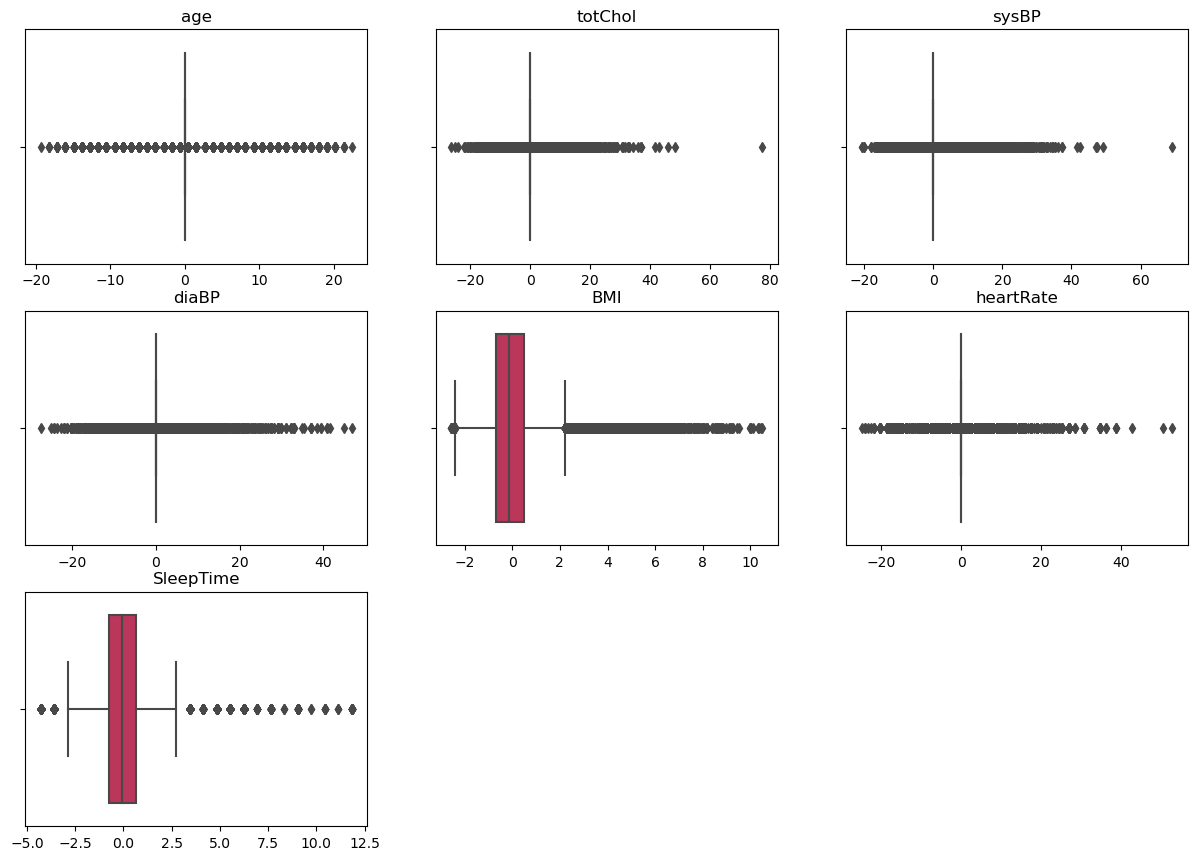

In [28]:
plt.figure(figsize=(15,14), dpi=100)
for i,j in zip(range(10),df_normales.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(x=df_normales[j], color='#D02050')
  plt.title(j)
  plt.xlabel('')

En un principio la idea era reemplazar todos los datos outliers, pero al hacer los graficos de las distribuciones se puede ver que en algunas variables hay demasiados datos atípicos. Esto lleva a pensar en la causa de los datos y la importancia de analizarlos como están. 
Se toma la decision de reemplazar los datos atípicos unicamente de las variables BMI y SleepTime

In [24]:
datos['BMI'] = datos_z['BMI'].apply(lambda x: datos['BMI'].mean() if (x>2 or x<-2) else x)
datos['SleepTime'] = datos_z['SleepTime'].apply(lambda x: datos['SleepTime'].mean() if (x>2 or x<-2) else x)

In [25]:
df_normales =  datos.copy()

VISUALIZACION DE LA VARIABLE SIN OUTLIERS

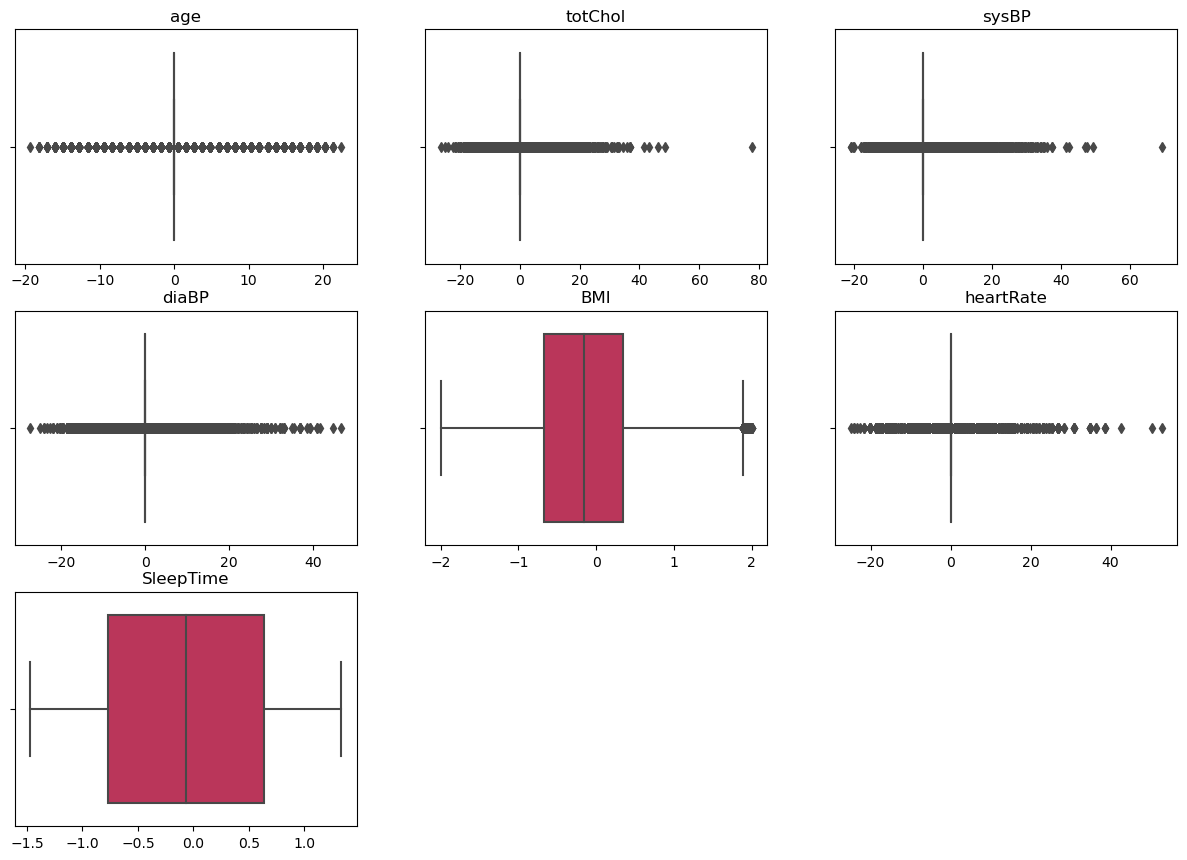

In [31]:
plt.figure(figsize=(15,14), dpi=100)
for i,j in zip(range(10),datos.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(x=datos[j], color='#D02050')
  plt.title(j)
  plt.xlabel('')

Podemos ver que las dos variables modificadas ya no tienen outliers

### Tratamiento de outliers en variables NO normales

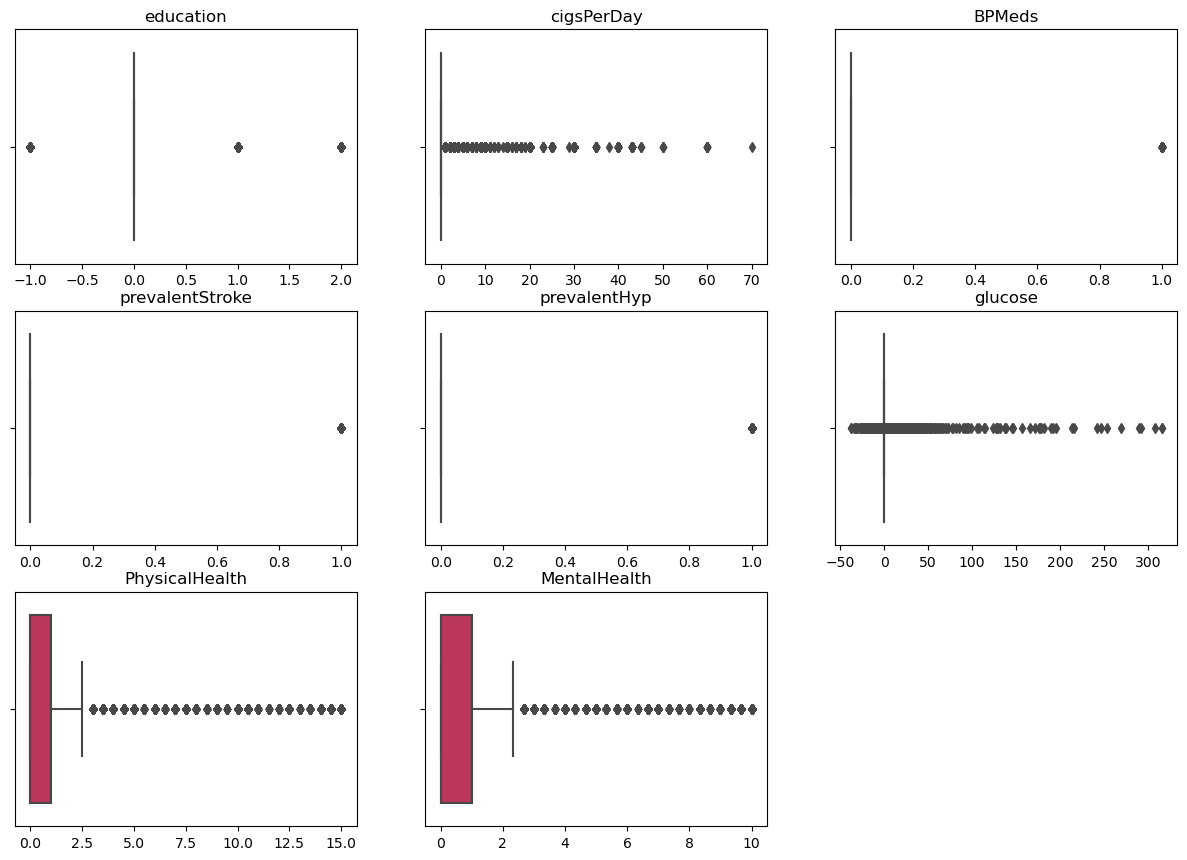

In [26]:
plt.figure(figsize=(15,14), dpi=100)
for i,j in zip(range(10),df_NOnormales.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(x=df_NOnormales[j], color='#D02050')
  plt.title(j)
  plt.xlabel('')

Se puede observar que hay demasiados outliers, se toma la decision de no reemplazarlos

### Preparación del dataset limpio

In [26]:
categoricas.reset_index(drop=True, inplace=True)
df_normales.reset_index(drop=True, inplace=True)
df_NOnormales.reset_index(drop=True, inplace=True)

In [27]:
df_limpio = pd.concat ([categoricas, df_normales, df_NOnormales], axis=1)
df_limpio.reset_index(drop=True, inplace=True)
df_limpio.head()

,AgeCategory,Race,GenHealth,sex,Smoking,diabetes,HeartDisease,AlcoholDrinking,DiffWalking,PhysicalActivity,...,heartRate,SleepTime,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,glucose,PhysicalHealth,MentalHealth
0,9,5,4,3,0,0,0,0,0,1,...,3.359360,-1.885215e-16,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,9,5,4,2,0,0,0,0,0,1,...,15.131860,-1.885215e-16,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0
2,9,5,4,3,1,0,0,0,0,1,...,-0.564807,-1.885215e-16,-1.0,20.0,0.0,0.0,0.0,-8.0,0.0,0.0
3,9,5,4,2,1,0,1,0,0,1,...,-8.413140,-1.885215e-16,1.0,30.0,0.0,0.0,1.0,25.0,0.0,0.0
4,9,5,4,2,1,0,0,0,0,1,...,7.283527,-1.885215e-16,1.0,23.0,0.0,0.0,0.0,7.0,0.0,0.0


In [28]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323469 entries, 0 to 323468
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   AgeCategory       323469 non-null  int32  
 1   Race              323469 non-null  int32  
 2   GenHealth         323469 non-null  int32  
 3   sex               323469 non-null  int32  
 4   Smoking           323469 non-null  int64  
 5   diabetes          323469 non-null  int64  
 6   HeartDisease      323469 non-null  int64  
 7   AlcoholDrinking   323469 non-null  int64  
 8   DiffWalking       323469 non-null  int64  
 9   PhysicalActivity  323469 non-null  int64  
 10  Asthma            323469 non-null  int64  
 11  KidneyDisease     323469 non-null  int64  
 12  SkinCancer        323469 non-null  int64  
 13  age               323469 non-null  float64
 14  totChol           323469 non-null  float64
 15  sysBP             323469 non-null  float64
 16  diaBP             32

### Correlaciones

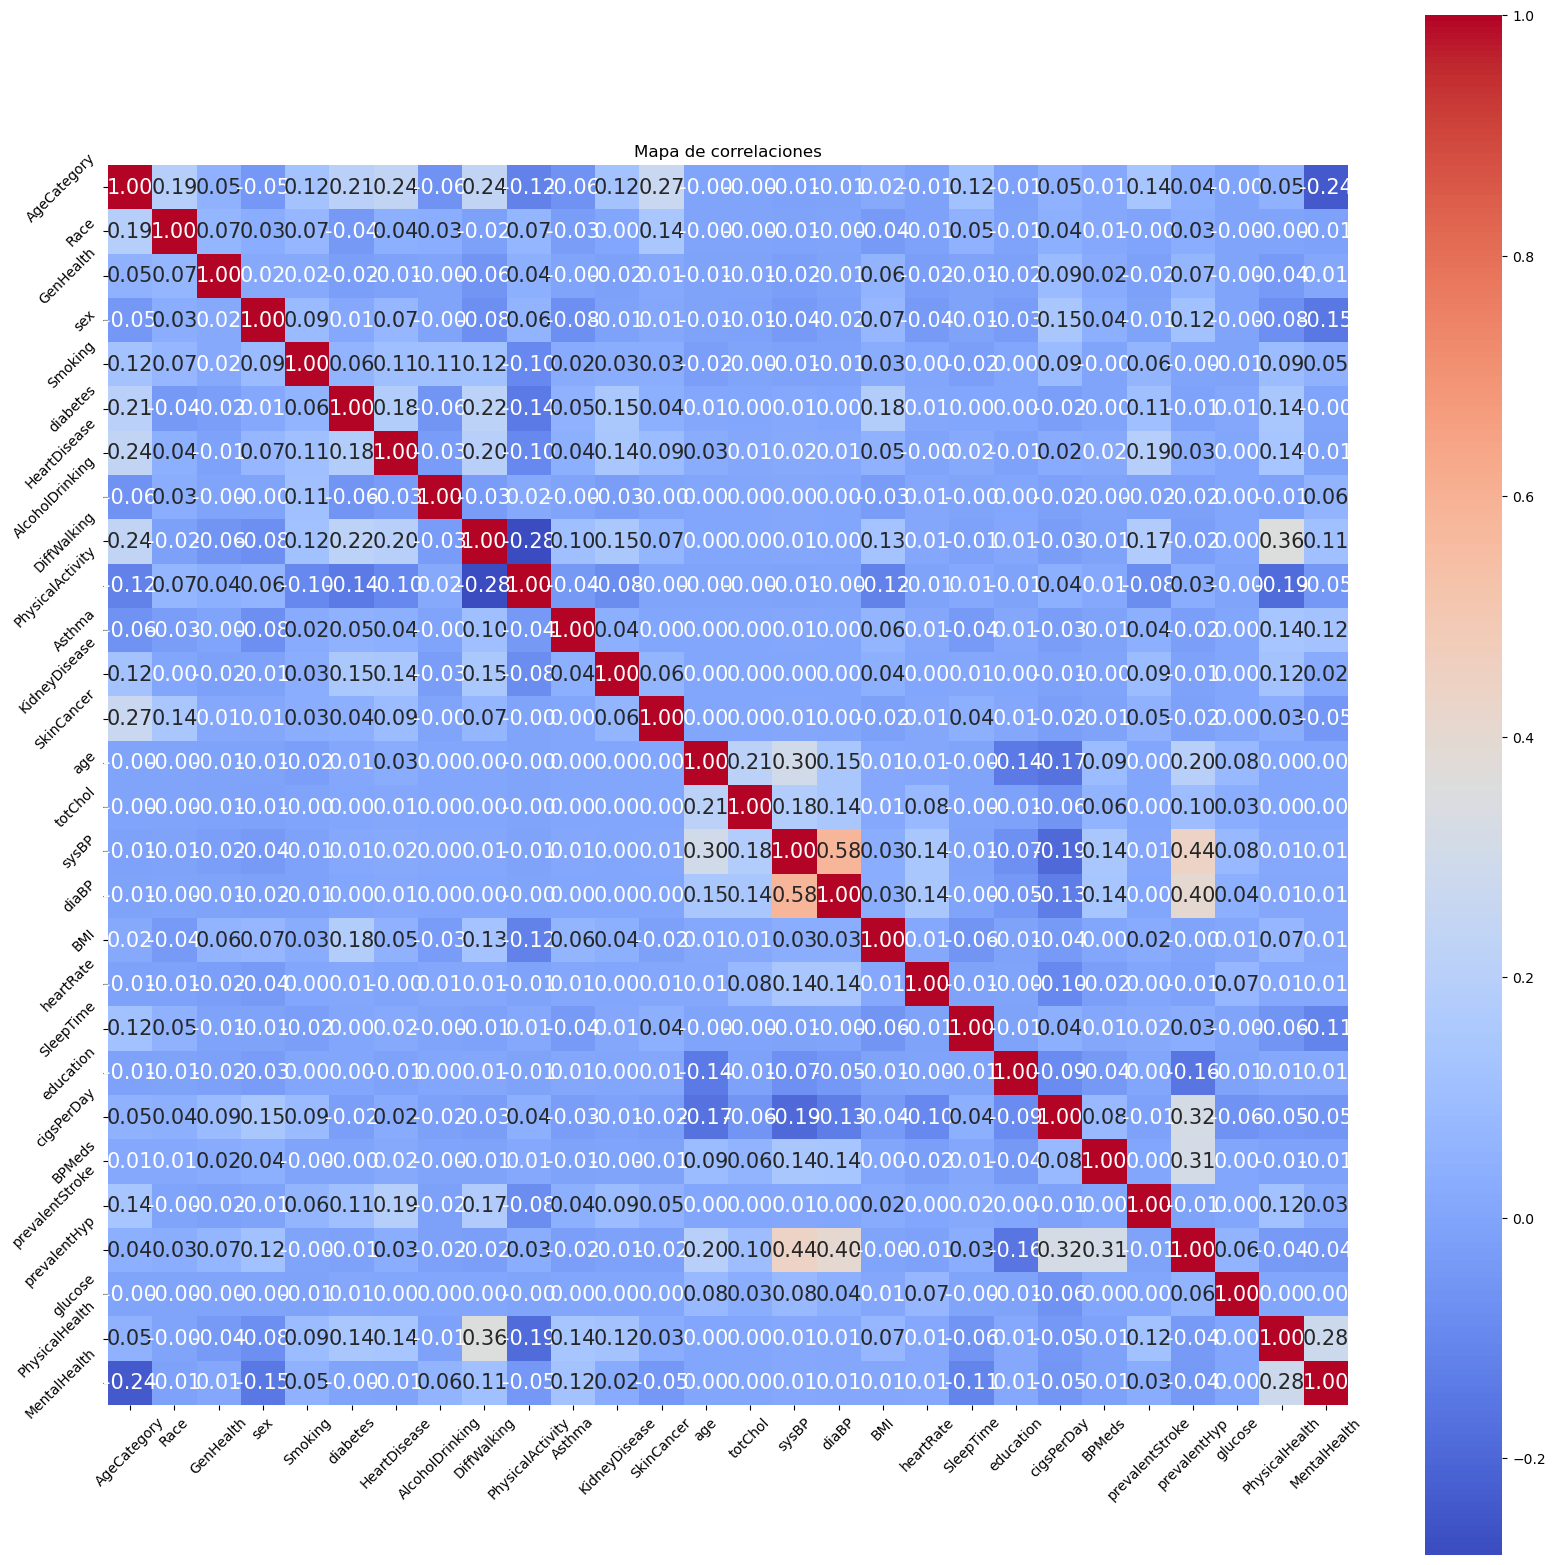

In [29]:
correlation = df_limpio.corr(method="spearman")


plt.figure(figsize=(20,20)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')

plt.title('Mapa de correlaciones')

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En este gráfico se observan las distintas correlaciones entre las variable. Si la correlación es mayor a 0.5 significa que ambas variables estan dependiendo una de otra. Gráficamente en color azul estan los valores normales y cuando se van acercando al naranja la correlación va aumentando. Por ejemplo: sysBP y diaBP tienen una correlación de 0.58 en color naranja. Para realizar la predicción probablemente se va a tener que eliminar una de las variables.


# Análisis Univariado

### Medidas de tendencia central

Las medidas de tendencia central se representan a través de un número que permite entender la región central de un conjunto de valores de datos. 

MEDIA

In [30]:
print('Calculo de la media')
for columna in df_limpio:
    media = np.mean (df_limpio[columna])
    print(f'{columna}: {media}')

#df_media = pd.DataFrame(media, columns=['Media'])

Calculo de la media
AgeCategory: 6.5427660765019215
Race: 4.403593543739895
GenHealth: 2.2411112038557017
sex: 0.4975685459812223
Smoking: 0.4133502746785627
diabetes: 0.12644488343550694
HeartDisease: 0.08640086066980143
AlcoholDrinking: 0.06732329836862265
DiffWalking: 0.13729290905774588
PhysicalActivity: 0.7779138031774296
Asthma: 0.13253820304264088
KidneyDisease: 0.03641461778408441
SkinCancer: 0.09218503164136285
age: -2.3397323998652754e-14
totChol: 1.581575884388526e-17
sysBP: 6.220865145261536e-17
diaBP: 3.348386754943829e-14
BMI: -0.1168262461507309
heartRate: -2.2300446465657163e-14
SleepTime: -0.009234884334260304
education: -0.0001793062086320482
cigsPerDay: 0.10327110171299259
BPMeds: 0.0003431549854854716
prevalentStroke: 0.03737607004071487
prevalentHyp: 0.0035212029591707395
glucose: 0.042813994540435094
PhysicalHealth: 1.666706855989291
MentalHealth: 1.2846960089941641


MEDIANA

In [29]:
print('Calculo de la mediana')
for columna in df_limpio:
    mediana = np.median (df_limpio[columna])
    print(f'{columna}: {mediana}')

Calculo de la mediana
AgeCategory: 7.0
Race: 5.0
GenHealth: 2.0
sex: 0.0
Smoking: 0.0
diabetes: 0.0
HeartDisease: 0.0
AlcoholDrinking: 0.0
DiffWalking: 0.0
PhysicalActivity: 1.0
Asthma: 0.0
KidneyDisease: 0.0
SkinCancer: 0.0
age: -2.3407283094616906e-14
totChol: 0.0
sysBP: 0.0
diaBP: 3.34850719584002e-14
BMI: -0.1540161214187536
heartRate: -2.2306305093144188e-14
SleepTime: -0.06798763531100988
education: 0.0
cigsPerDay: 0.0
BPMeds: 0.0
prevalentStroke: 0.0
prevalentHyp: 0.0
glucose: 0.0
PhysicalHealth: 0.0
MentalHealth: 0.0


MODA

In [60]:
print('Calculo de la moda')
for columna in df_limpio:
    moda = stats.mode (df_limpio[columna])
    print(f'{columna}: {moda}')

Calculo de la moda
AgeCategory: ModeResult(mode=9, count=37825)
Race: ModeResult(mode=5, count=248886)
GenHealth: ModeResult(mode=4, count=117532)
sex: ModeResult(mode=0, count=167816)
Smoking: ModeResult(mode=0, count=189763)
diabetes: ModeResult(mode=0, count=282568)
HeartDisease: ModeResult(mode=0, count=295521)
AlcoholDrinking: ModeResult(mode=0, count=301692)
DiffWalking: ModeResult(mode=0, count=279059)
PhysicalActivity: ModeResult(mode=1, count=251631)
Asthma: ModeResult(mode=0, count=280597)
KidneyDisease: ModeResult(mode=0, count=311690)
SkinCancer: ModeResult(mode=0, count=293650)
age: ModeResult(mode=-2.3407283094616906e-14, count=319795)
totChol: ModeResult(mode=0.0, count=319795)
sysBP: ModeResult(mode=0.0, count=319795)
diaBP: ModeResult(mode=3.34850719584002e-14, count=319795)
BMI: ModeResult(mode=1.3617368364585209e-15, count=14046)
heartRate: ModeResult(mode=-2.2306305093144188e-14, count=319795)
SleepTime: ModeResult(mode=-0.06798763531100988, count=97751)
education: 

### Medidas de dispersión

Una medida de dispersión estadística es un número real no negativo que es cero si todos los datos son iguales y aumenta a medida que los datos se vuelven más diversos.

DESVIACIÓN ESTÁNDAR

In [30]:
print('Calculo de la desviación estandar')
for columna in df_limpio:
    std = np.std (df_limpio[columna])
    print(f'{columna}: {std}')

Calculo de la desviación estandar
AgeCategory: 3.554223494162029
Race: 1.206996636609427
GenHealth: 1.5375069009949407
sex: 0.5411317214918882
Smoking: 0.49243458966890674
diabetes: 0.3323500788150005
HeartDisease: 0.28095507104361683
AlcoholDrinking: 0.25058106844995615
DiffWalking: 0.344156310678624
PhysicalActivity: 0.4156487916551835
Asthma: 0.3390749589359526
KidneyDisease: 0.18731949550392807
SkinCancer: 0.2892869709874299
age: 0.9999999999999987
totChol: 0.9999999999999987
sysBP: 0.9999999999999969
diaBP: 1.0000000000000049
BMI: 0.7741329588004996
heartRate: 1.0000000000000013
SleepTime: 0.6780588096934842
education: 0.10901211584320547
cigsPerDay: 1.595833229752712
BPMeds: 0.018521264269641204
prevalentStroke: 0.1896815737733555
prevalentHyp: 0.05923515922871696
glucose: 2.5762809558950943
PhysicalHealth: 3.9568126500686325
MentalHealth: 2.6402318099902438


VARIANZA

In [32]:
print('Calculo de la varianza')
for columna in df_limpio:
    var = df_limpio[columna].var()
    print(f'{columna}: {var}')

Calculo de la varianza
AgeCategory: 12.63254369978983
Race: 1.4568453846040976
GenHealth: 2.3639347786791802
sex: 0.2928244452675516
Smoking: 0.24249257476487082
diabetes: 0.1104569163643869
HeartDisease: 0.07893599597467833
AlcoholDrinking: 0.06279106598324535
DiffWalking: 0.11844393234772234
PhysicalActivity: 0.17276445210336056
Asthma: 0.11497218321235361
KidneyDisease: 0.035088701872089206
SkinCancer: 0.0836872103009509
age: 1.0000030914959106
totChol: 1.0000030914959106
sysBP: 1.0000030914959068
diaBP: 1.000003091495923
BMI: 0.5992836905785687
heartRate: 1.0000030914959157
SleepTime: 0.4597651707606968
education: 0.01188367813884127
cigsPerDay: 2.546691570245214
BPMeds: 0.00034303829064408296
prevalentStroke: 0.035979210658375754
prevalentHyp: 0.0035088149363049523
glucose: 6.637244082657262
PhysicalHealth: 15.656414749335731
MentalHealth: 6.970845560758296


### Medidas de Localización

Las medidas de localización son números que permiten comprender la distribución de los datos y cantidad de datos por debajo de cierto umbral. La medida más conocida son los cuartiles, sin embargo, existen muchas otras como los deciles y percentiles.

- Variables normales

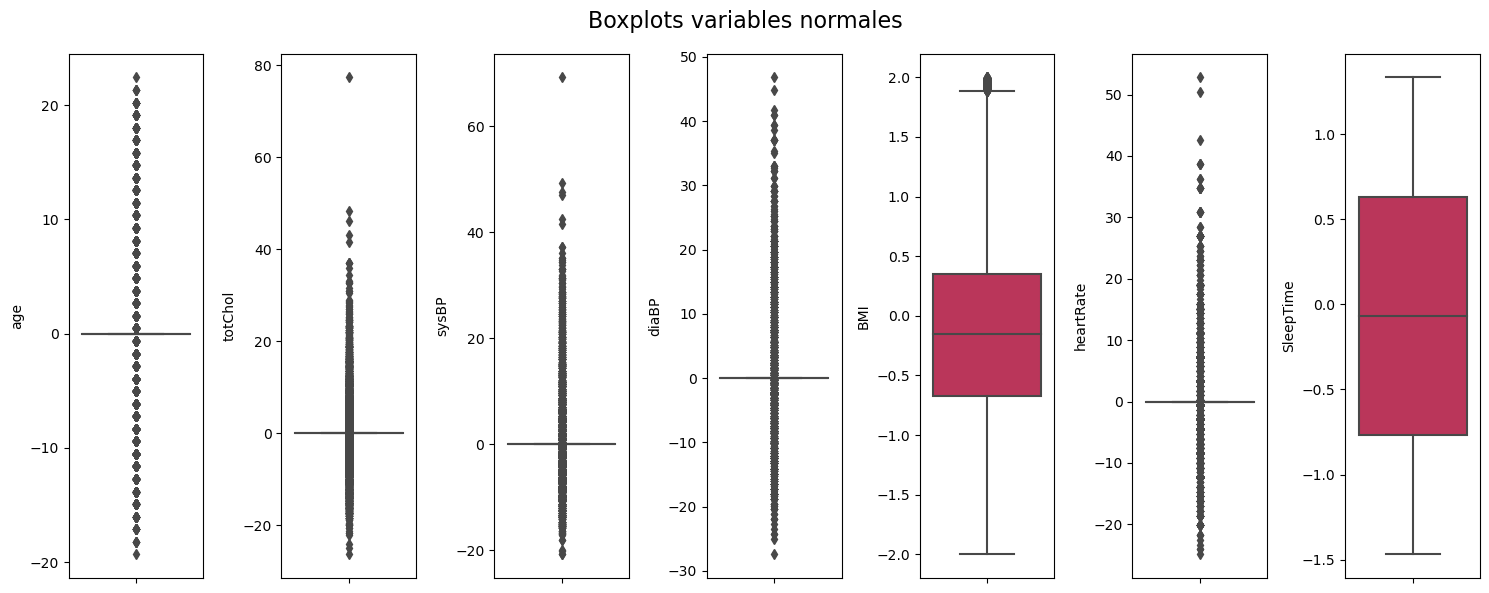

In [37]:
variables = df_normales.columns

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))
for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_limpio, ax=ax, color="#D02050")
fig.suptitle('Boxplots variables normales', fontsize=16)
plt.tight_layout()

- La caja representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). En otras palabras, contiene el 50% central de los datos.
- La línea en medio de la caja representa la mediana (Q2), que es el valor que divide al conjunto de datos en dos mitades iguales.
- Los bigotes se extienden desde la caja hasta los puntos que están dentro de 1.5 veces el rango intercuartílico desde los cuartiles Q1 y Q3. Indican dispersión de los datos mas allá de la mediana y los cuartiles
- Por fuera de los bigotes se encuentran los valores atípicos o puntos que están significativamente fuera de la mayoría de los datos.

Como se había analizado anteriormente a la hora de tratar los outliers, se observa que hay muchísimos. La variable BMI y SleepTime son las que se tomó la decisión de eliminar los ouliers, y ahora se ve que casi no tienen. La distribución de BMI y de SleeTime se ven normales.

- Variables no normales

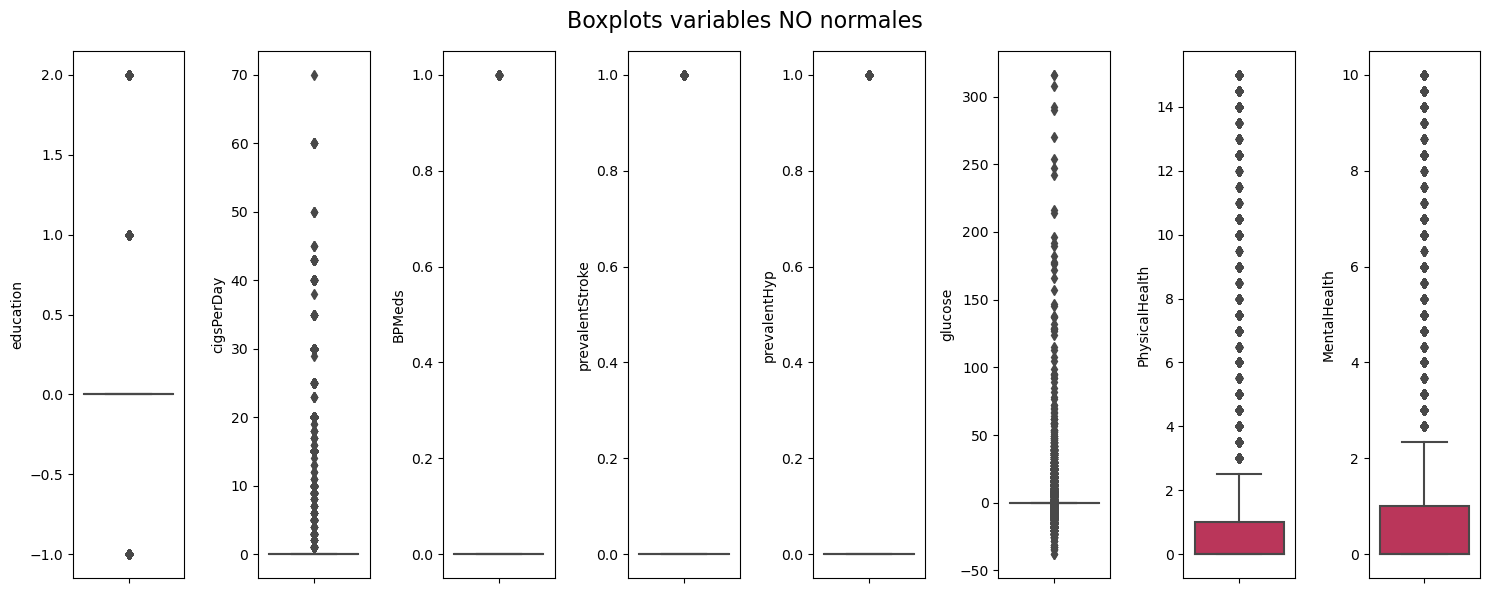

In [33]:
variables = df_NOnormales.columns

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_limpio, ax=ax, color="#D02050")
fig.suptitle('Boxplots variables NO normales', fontsize=16)
plt.tight_layout()

Muchísimos datos atípicos, nos lleva a pensar en el por qué de ellos.

### Medidas de asimetría

¿ Cómo es la distribución de mis variables ?

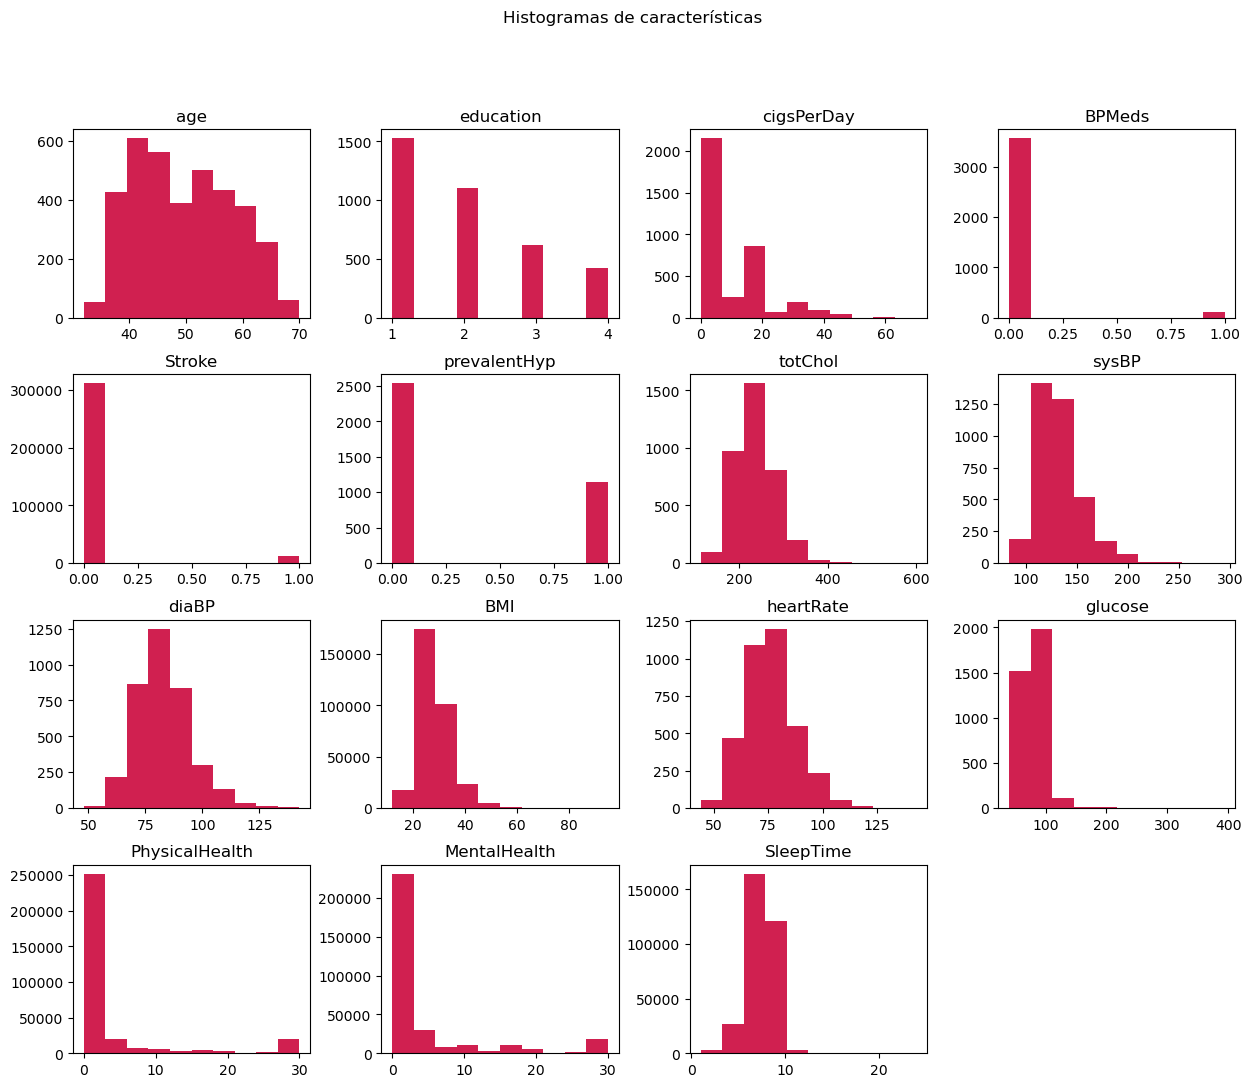

In [39]:
numericas.hist(figsize=(15, 12), grid=False, color='#D02050')
#FF2050
plt.suptitle("Histogramas de características ")
plt.show()

En estos histogramas se pueden ver cada una de las distribuciones de las variables numéricas. Algunas son normales o tienden fuertemente a ello, es decir que siguen la campana de gauss como por ejemplo diaBP, heartRate, BMI, SleepTime. En otros casos se observa que hay un mayor sesgo hacia la derecha o hacia la izquierda. Ejemplo: glucose, PhysicalHealth, MentalHealth, age y SysBp estan sesgados a izquierda. Tambien se pueden ver otras variables que no siguen la campana de gauss y su distribución es bastante asimétrica, como es education, cigsperDay, prevalentHyp y Stroke.

### Qué porcentaje del dataset presentan una enfermedad cardíaca?

- GRÁFICO DE TORTA

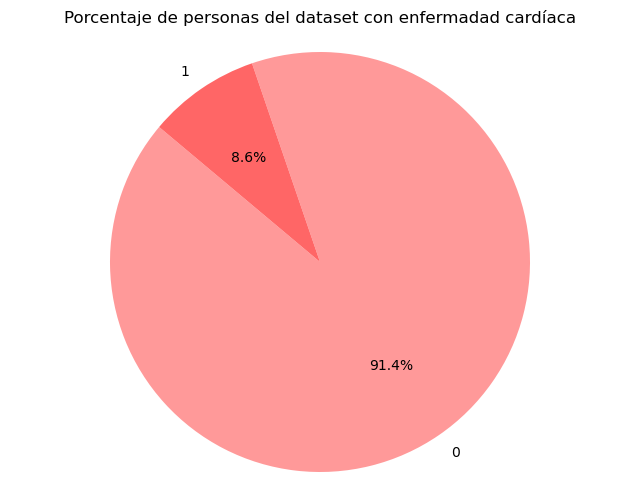

In [31]:
counts = df_limpio['HeartDisease'].value_counts()
colors = ['#FF9999', '#FF6666', '#FF3333', '#FF0000', '#CC0000', '#990000', '#660000']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de personas del dataset con enfermadad cardíaca')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()

Se observa que el 91% del dataset no presenta una enfermedad cardíaca, mientras que el 8,6% si. Esto nos hace pensar en si nos alcanza la cantidad de datos para hacer una buena predicción. Los datos se encuentran desbalanceados, por lo que para entrenar se aplicará alguna técnica de balanceo

# Análisis Bivariado

A continuación se buscarán posibles relaciones entre la variable target que quiero predecir: heartDisease y algunas otras, respondiendo a preguntas o hipótesis

### Influye la edad en la posibilidad de contraer una enfermedad cardíaca?
- VARIABLE CATEGORICA VS VARIABLE NUMERICA

c:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\VICTUS\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


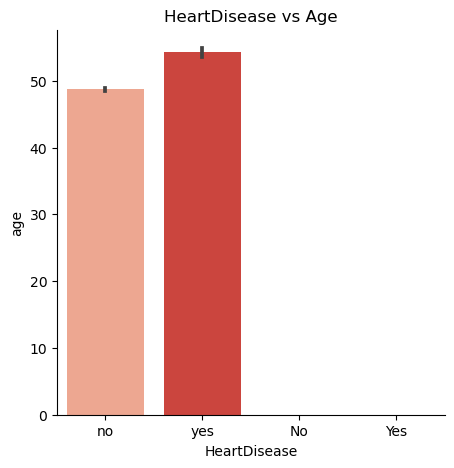

In [67]:
custom_palette = sns.color_palette("Reds", 2)
plt.figure(figsize=(5,5))
sns.barplot(y='age', x= 'HeartDisease', data=df, palette=custom_palette)
plt.title('HeartDisease vs Age')

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Podemos observar que hay una tendencia a que a mayor edad es mayor la posibilidad de tener una enfermedad del corazón. Si bien cambia, tampoco es demasidado representativa porque la diferencia no es enorme.

### Si una persona fuma es más propensa a padecer una enfermedad del corazón?
- Variable categórica vs variable categórica

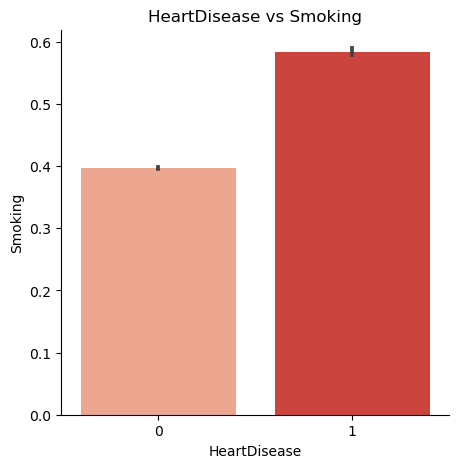

In [68]:
custom_palette = sns.color_palette("Reds", 2)
plt.figure(figsize=(5,5))
sns.barplot(y='Smoking', x= 'HeartDisease', data=df_limpio, palette=custom_palette)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('HeartDisease vs Smoking')
plt.show()

En este caso, si podemos ver que la diferencia entre una persona que fuma y una persona que no fuma es bastante llamativa. Claramente se ve que la persona que fuma tiene mas riesgo de padecer una enfermedad cardíaca. Podemos estar en presencia de una de las variables claves para hacer la predicción.

### SysBp y diaBP, están relacionadas? Influyen en la misma medida?

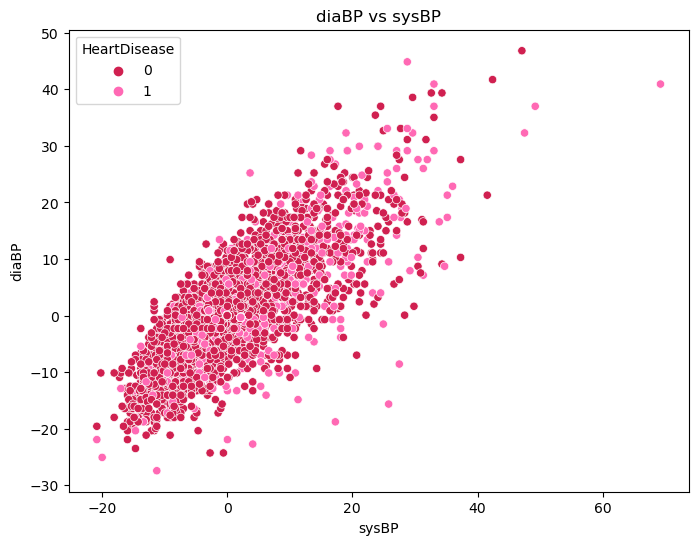

In [69]:
#custom_palette = sns.color_palette("Reds_r", 7)
custom_palette = ["#D02050", "#FF69B4"] 
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df_limpio, x='sysBP', y='diaBP', hue='HeartDisease', palette=custom_palette)
ax.grid(False)
ax.set_title('diaBP vs sysBP')
plt.show()

Se puede observar que hay una fuerte relacion entre las variables, esto lleva a pensar a que posteriormente puede que una de las dos variables se elimine. A esta misma conclusión habíamos llegado con el mapa de correlaciones.

### Cómo influye la glucosa en la posibilidad de contraer una enfermedad cardíaca?

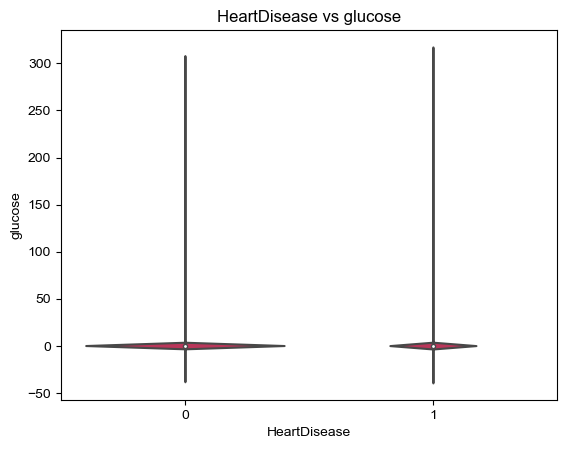

In [70]:
sns.violinplot(x='HeartDisease', y='glucose', data=df_limpio, color="#D02050")
sns.set(rc={'figure.figsize':(15,25)})
plt.title('HeartDisease vs glucose')
plt.show()

En este gráfico se observa que las personas que no tienen una enfermedad cardíaca, representan un porcentaje mayor al mismo nivel de glucosa. Esto se ve en la anchura de la parte mas gruesa del violin que indica una mayor densidad en los datos. Esto nos hace pensar que lo más probable es que la glucosa no influya en el riesgo de una enfermdedad del corazón.

# Pasos previos al Entrenamiento

### Variable dependiente vs independiente

Se sabe que la variable target es Heart Disease (la variable que se quiere predecir), por eso se procede a dividir el dataset entre la variable dependiente y las independientes

In [32]:
counts = df_limpio['HeartDisease'].value_counts
print("Distribución total en el DataFrame: {}".format(counts))


Distribución total en el DataFrame: <bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         1
4         0
         ..
323464    1
323465    0
323466    0
323467    0
323468    0
Name: HeartDisease, Length: 323469, dtype: int64>


In [33]:
Y_df = df_limpio[['HeartDisease']].copy()
X_df = df_limpio.drop('HeartDisease', axis=1).copy()

### Eliminación de variables que dependen de otras

Así como se observó en el mapa de correlaciones y en los gráficos realizados en el análisis bivariado, se llega a la conclusión que sysBP y diaBP son variables que dependen una de otra, por lo que se procede a eliminar una de las dos, para un mejor resultado en la predicción

In [34]:
X_df.drop('sysBP', axis=1, inplace=True)

### Datos de Entrenamiento y datos de prueba

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=42)

# Balanceo de la variable target

Anteriormente, se habia analizado que la variable target se encontraba desbalanceada, por eso, se hace un balanceo con una tecnica denominada oversampling. Se trata de crear muestras nuevas sinteticas de la clase minoritaria.

In [65]:
print("Distribución en el conjunto de entrenamiento: {}".format(y_train.value_counts()))
print("Distribución en el conjunto de prueba: {}".format(y_test.value_counts()))

Distribución en el conjunto de entrenamiento: HeartDisease
0               206747
1                19681
Name: count, dtype: int64
Distribución en el conjunto de prueba: HeartDisease
0               88774
1                8267
Name: count, dtype: int64


In [66]:
os = RandomOverSampler(sampling_strategy='minority', random_state=1) #defino el objeto


In [67]:
print("Distribución en el conjunto de entrenamiento antes del sobremuestreo: {}".format(y_train.value_counts()))


Distribución en el conjunto de entrenamiento antes del sobremuestreo: HeartDisease
0               206747
1                19681
Name: count, dtype: int64


In [68]:
#transformo a pandas series
if isinstance(y_train, pd.DataFrame) and y_train.shape[1] == 1:
    y_train = y_train.squeeze() 

In [69]:
X_train_res, Y_train_res = os.fit_resample(X_train, y_train) #aplico el sobremuestreo para balancear los datos


In [70]:
if isinstance(Y_train_res, pd.DataFrame) and y_train_res.shape[1] == 1:
    y_train_res = Y_train_res.squeeze()

In [71]:
print("Distribución despues del resampleo: {}".format(Y_train_res.value_counts()))
Y_train_res_series = pd.Series(Y_train_res)

Distribución despues del resampleo: HeartDisease
0    206747
1    206747
Name: count, dtype: int64


In [72]:
y_train = Y_train_res.copy()
X_train = X_train_res.copy()


### Verificacion del balanceo de la variable target

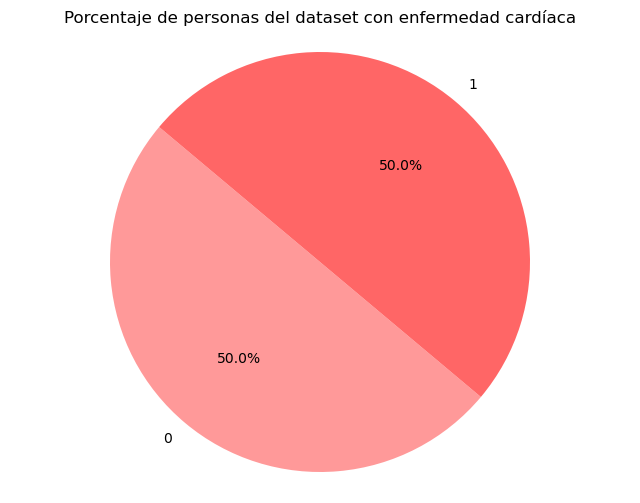

In [73]:
# Si y_train es un DataFrame, conviértelo a una Serie
if isinstance(y_train, pd.DataFrame) and y_train.shape[1] == 1:
    y_train = y_train.squeeze()

# Cuenta las ocurrencias de cada clase
counts = y_train.value_counts()

# Definir colores para el gráfico
colors = ['#FF9999', '#FF6666', '#FF3333', '#FF0000', '#CC0000', '#990000', '#660000']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de personas del dataset con enfermedad cardíaca')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()

# PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA() #le aplico pca a todas las variables
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [76]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.07870052e-01, 2.85326313e-01, 1.41303363e-01, 7.36167629e-02,
       5.15470285e-02, 2.56612749e-02, 2.26404946e-02, 1.77045810e-02,
       1.64611711e-02, 1.54167594e-02, 1.30042367e-02, 7.33381518e-03,
       5.46871080e-03, 3.33874149e-03, 2.84660113e-03, 2.18680399e-03,
       1.76011819e-03, 1.48023680e-03, 1.31286899e-03, 1.23978523e-03,
       8.96572171e-04, 7.48705789e-04, 6.05481990e-04, 1.86134421e-04,
       3.57690128e-05, 7.61772372e-06])

In [77]:
varianza_explicada_acumulada = np.cumsum(explained_variance)
varianza_explicada_acumulada

array([0.30787005, 0.59319637, 0.73449973, 0.80811649, 0.85966352,
       0.88532479, 0.90796529, 0.92566987, 0.94213104, 0.9575478 ,
       0.97055204, 0.97788585, 0.98335456, 0.9866933 , 0.98953991,
       0.99172671, 0.99348683, 0.99496706, 0.99627993, 0.99751972,
       0.99841629, 0.999165  , 0.99977048, 0.99995661, 0.99999238,
       1.        ])

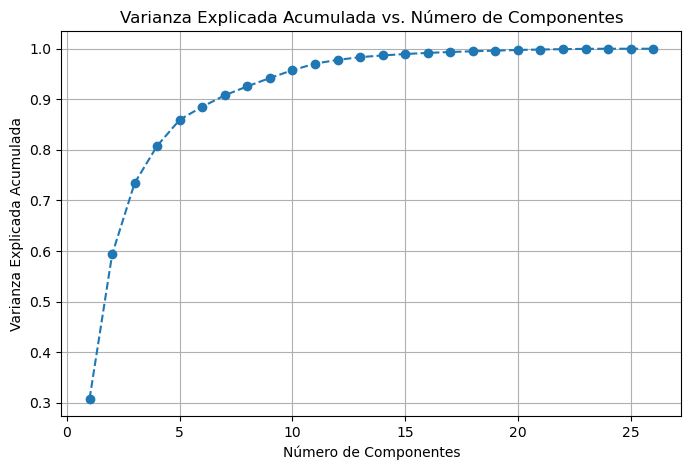

Componente 1: 0.3079
Componente 2: 0.2853
Componente 3: 0.1413
Componente 4: 0.0736
Componente 5: 0.0515
Componente 6: 0.0257
Componente 7: 0.0226
Componente 8: 0.0177
Componente 9: 0.0165
Componente 10: 0.0154
Componente 11: 0.0130
Componente 12: 0.0073
Componente 13: 0.0055
Componente 14: 0.0033
Componente 15: 0.0028
Componente 16: 0.0022
Componente 17: 0.0018
Componente 18: 0.0015
Componente 19: 0.0013
Componente 20: 0.0012
Componente 21: 0.0009
Componente 22: 0.0007
Componente 23: 0.0006
Componente 24: 0.0002
Componente 25: 0.0000
Componente 26: 0.0000


In [78]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes')
plt.grid()
plt.show()

# Imprimir la varianza explicada por cada componente
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {varianza:.4f}")

Con el metodo del codo, puedo ver que a partir del componente 15, la varianza se incrementa de forma minima, por lo que tomo ese numero para aplciar pca

In [79]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Arbol de decision

In [83]:
clf = DecisionTreeClassifier(random_state=42) #algoritmo
model = clf.fit(X_train_pca, y_train)

In [48]:
#grafico no se como hacerlo

In [85]:
#prediccion
pred=model.predict(X_test_pca)

In [86]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred) #se comparan los datos de test y pred
accuracy

0.8622540987829886

La metrica que se obtuvo determina que la prediccion fue del 86%. Aplicando pca nos da una metrica mejor, por eso se entrena este algortimo con las variables x_train_pca y x_test_pca

# KNN

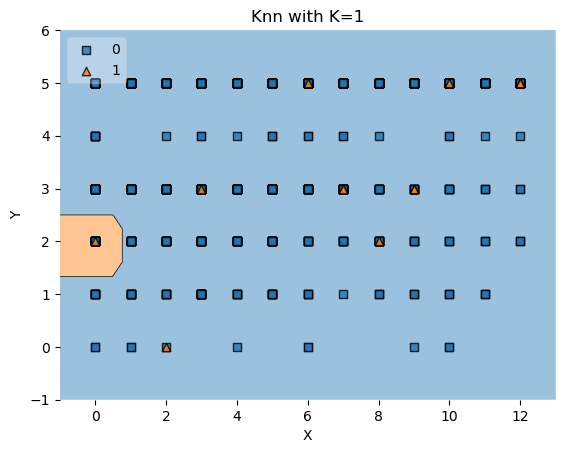

In [63]:
#defino el clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors=1) #algoritmo

#convierto a arrays de numpy
X_array = X_df.to_numpy()
Y_array = Y_df.to_numpy().ravel()

clf.fit(X_array,Y_array) #entrenamiento

#defino valores de relleno
filler_values = {i: 0 for i in range(2, X_array.shape[1])}
filler_ranges = {i: 1 for i in range(2, X_array.shape[1])}


plot_decision_regions(X_array, Y_array, clf=clf, legend=2, filler_feature_values=filler_values, filler_feature_ranges=filler_ranges)

#plot_decision_regions(X_array, Y_array, clf=clf, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(1))
plt.show()


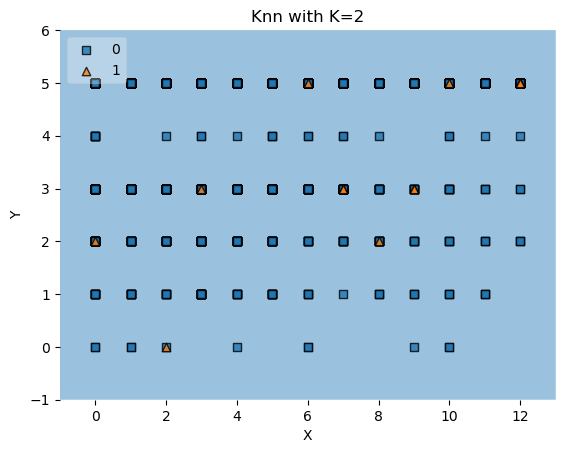

In [64]:
#defino el clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors=2) #algoritmo

#convierto a arrays de numpy
X_array = X_df.to_numpy()
Y_array = Y_df.to_numpy().ravel()

clf.fit(X_array,Y_array) #entrenamiento

#defino valores de relleno
filler_values = {i: 0 for i in range(2, X_array.shape[1])}
filler_ranges = {i: 1 for i in range(2, X_array.shape[1])}


plot_decision_regions(X_array, Y_array, clf=clf, legend=2, filler_feature_values=filler_values, filler_feature_ranges=filler_ranges)

#plot_decision_regions(X_array, Y_array, clf=clf, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(2))
plt.show()

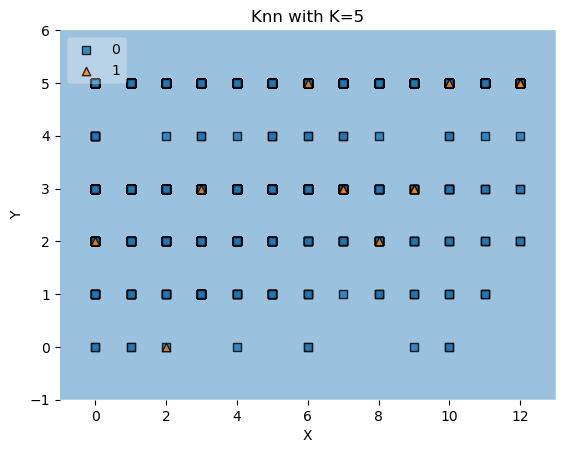

In [65]:
#defino el clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors=5) #algoritmo

#convierto a arrays de numpy
X_array = X_df.to_numpy()
Y_array = Y_df.to_numpy().ravel()

clf.fit(X_array,Y_array) #entrenamiento

#defino valores de relleno
filler_values = {i: 0 for i in range(2, X_array.shape[1])}
filler_ranges = {i: 1 for i in range(2, X_array.shape[1])}


plot_decision_regions(X_array, Y_array, clf=clf, legend=2, filler_feature_values=filler_values, filler_feature_ranges=filler_ranges)

#plot_decision_regions(X_array, Y_array, clf=clf, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(5))
plt.show()

# Regresion Logística


In [93]:
model = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced") 

#model = LogisticRegression (max_iter=10000,n_jobs = -1) --> no se balancea asi
model.fit(X_train, y_train)

predicciones = model.predict(X_test)
predicciones

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

El parametro class_weight = "balanced" se usa para balancear los datos, ya que anteriormente habiamos llegado a la conclusion de que la variable target no representa el 50% de los datos, sino que mucho menos

In [94]:
print(accuracy_score(y_test, predicciones))


0.7406044867633268


Aplicando pca nos da un accuracy menor por lo que se toma la decision de entrenar el algoritmo con las variables x_test, x_train sin modificaciones 

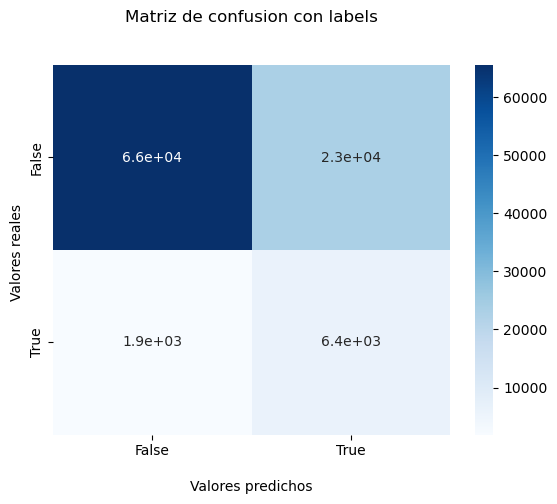

In [95]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()